# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Author**          - Aparna Praturi


# **Project Summary -**


 Seoul Bike Sharing Demand Dataset is comprised of hourly rental data for bikes in Seoul, South Korea, covering the period from December 2017 to November 2018. This dataset is regarded as valuable for analyzing trends in bike rentals and forecasting demand.

* In the initial phase of the project, **data preprocessing** was conducted. New features such as Day, Month, Year, and Weekday were extracted from the Date column to facilitate exploratory data analysis (EDA) and modeling.

* In the second phase, **exploratory data analysis** was performed to uncover patterns and trends within the data. Key insights were revealed, indicating that bike rental demand increases with temperature up to a certain threshold, is higher on non-holidays, peaks during summer while being lowest in winter, and is adversely affected by rainfall and snowfall. Various visualization techniques, including histograms, box plots, scatter plots, line charts, bar charts, and correlation heatmaps, were employed.

* Following the EDA, **hypothesis testing** was conducted to validate the observations. Two-sample t-tests were utilized to examine whether bike rental demand is different ion working days vs. holidays, and one-way ANOVA tests were applied to assess demand variations across different seasons. T-test was also performed to check whether hourly bike rentals on rainy/snowy days exceeded 120. T

* The next step involved **feature engineering,** where outliers in Wind Speed, Solar Radiation, Rainfall, and Snowfall were addressed using  modified IQR.

  Cyclical encoding was applied to cyclical features such as month, Year and weekday. snowfall and Rainfall were converted to binary variables and Visibility, Solar radiation were convetred into categorical variables by binning.The rental bike demand and windspeed were transformed to normal distributions using sqrt transformation which preserves interpretability.

  Seasons was removed as it's data was already contained in months and date and day were removed to reduced redundancy in the data.To mitigate multicollinearity, the Dew Point Temperature feature was dropped based on Variance Inflation Factor (VIF) analysis. Data scaling was applied to relevant columns using StandardScaler.

* Subsequently, five different **machine learning models**—Linear Regression, Ridge Regression, Decision Tree, Random Forest, and XGBoost—were employed to predict bike rental demand. The performance of models was compared to a base model and the time taken for execution of each model was recorded by using a wrapper function.

  Hyperparameter tuning was conducted using GridSearchCV and RandomSearchCV, along with cross-validation to avoid overfitting. non-linear models performed better than linear models though their hyperparameter tuning and cross validation took significant time to execute. The optimized XGBoost model was found to yield the best results, achieving an \( R^2 \) score of 0.94 and a Mean Squared Error (MSE) of 8.356.

* Finally, SHAP values were used to interpret the XGBoost model, revealing that **Hour, Temperature, and Humidity** were significant predictors of bike rental demand. Both Hour and Temperature were found to positively influence demand, while Humidity was shown to have a negative effect.

In summary, it was highlighted that bike rental demand in Seoul is significantly impacted by weather conditions, day of the week, and month. To boost rental demand, it is recommended that promotions be focused on favorable weather, non-holiday days, and the summer season. Furthermore, insights from this analysis can assist companies in optimizing pricing strategies and managing inventory effectively.



# **GitHub Link -**

https://github.com/Aparna-Praturi/Bike-sharing-demand-prediction

# **Problem Statement**


The core challenge of this project is to forecast hourly rental bike demand so as to maintain consistent availability of rental bikes in urban areas. Ensuring a reliable supply of bikes can enhance public mobility, minimize waiting times, and ultimately boost customer satisfaction.

To tackle this issue, it is essential to create a predictive model that considers various influencing factors, including the time of day, seasonal trends, weather patterns, and holiday effects.

 By accurately estimating demand, operators of bike-sharing systems can guarantee that sufficient bikes are available at all times. This improvement in availability can enhance the overall user experience and encourage greater usage of the bike-sharing service.

  Additionally, a well-managed bike-sharing system can contribute positively to urban sustainability by alleviating congestion, reducing air pollution, and lowering greenhouse gas emissions.





# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [126]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor

!pip install xgboost
from xgboost import XGBRegressor

!pip install shap
import shap

import pickle





### Dataset Loading

In [6]:
# Mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:

# Defining the path to data file

path = '/content/drive/MyDrive/Data science/Datasets/SeoulBikeData.csv'

# Loading data to df

try:

  df = pd.read_csv(f'{path}', encoding='ISO-8859-1')

  print("Data loaded successfully!")

except FileNotFoundError:
    print(f"Error: The file(s) at {path} were not found. Please check the path.")

except pd.errors.EmptyDataError:
    print(f"Error: The file(s) at {path} is empty. Please check the file content.")

except pd.errors.ParserError:
    print(f"Error: There was a problem parsing the file(s) at {path}. Please check the file(s) format.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")




Data loaded successfully!


### Dataset First View

In [9]:
# Dataset First Look

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count

df.shape

(8760, 14)

### Dataset Information

In [11]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count

len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count

df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


<Axes: >

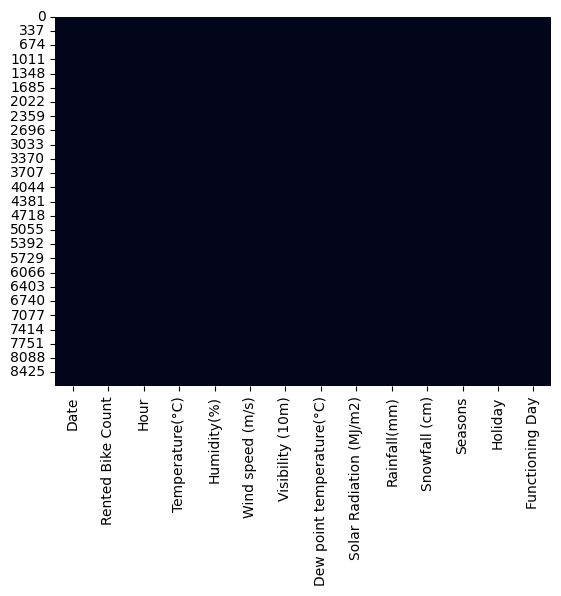

In [14]:
# Visualizing the missing values

sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset has 8760 rows and 14 columns. The dataset appears clean with no missing data and no duplicated data.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [16]:
# Dataset Describe

df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description


### Variable Definitions

1. **Date**: The date of the bike rental, typically formatted as YYYY-MM-DD, indicating when the rental occurred.

2. **Hour**: The hour of the day when the bike was rented, usually represented in a 24-hour format (0-23), indicating the specific time of the rental.

3. **Rented Bike Count**: The total number of bikes rented during a specific time period (e.g., hour or day).

4. **Temperature (°C)**: The air temperature on the rental day, measured in degrees Celsius.

5. **Humidity (%)**: The percentage of moisture in the air, indicating how humid the atmosphere is.

6. **Wind Speed (m/s)**: The speed of the wind on the rental day, measured in meters per second.

7. **Visibility (10m)**: A measure of how far one can see under the given weather conditions, expressed in terms of visibility at 10 meters.

8. **Dew Point Temperature (°C)**: The temperature at which air becomes saturated with moisture, indicating the level of humidity.

9. **Solar Radiation (MJ/m²)**: The amount of solar energy received per square meter, measured in megajoules per square meter, often influencing outdoor activities.

10. **Rainfall (mm)**: The amount of rain that fell on the rental day, measured in millimeters.

11. **Snowfall (cm)**: The amount of snow that fell on the rental day, measured in centimeters.

12. **Seasons**: A categorical variable indicating the season during which the rental occurred (e.g., Winter, Spring, Summer, Autumn).

13. **Holiday**: Whether the rental day is a public holiday.

14. **Functioning Day**: Whether the rental station is operational on that day.







### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.

for i in df.columns:
  print(f' {i} : {df[i].nunique()}')

 Date : 365
 Rented Bike Count : 2166
 Hour : 24
 Temperature(°C) : 546
 Humidity(%) : 90
 Wind speed (m/s) : 65
 Visibility (10m) : 1789
 Dew point temperature(°C) : 556
 Solar Radiation (MJ/m2) : 345
 Rainfall(mm) : 61
 Snowfall (cm) : 51
 Seasons : 4
 Holiday : 2
 Functioning Day : 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.

# convert date to date_time object

df['Date'] = pd.to_datetime(df['Date'], format = "%d/%m/%Y")

In [19]:
# Extract year, month, weekday, and date from the date

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday

In [20]:
# checking unique values of date, month, weekday and year

print(len(df['Year'].unique()))
print(len(df['Month'].unique()))
print(len(df['Day'].unique()))
print(len(df['weekday'].unique()))

2
12
31
7


In [21]:
# new shape and info of the data

df.shape

(8760, 18)

### What all manipulations have you done and insights you found?

I have converted the date to a date_time object and extracted the year, month, weekday, and date to separate variables to enable detailed analysis.

The dataset describes the rented bike data over two years.

In [22]:
# Viweing the modified dataset
df. head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4


In [23]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 :  Histogram and boxplot showing the distribution of target variable, i.e;  rented bike count

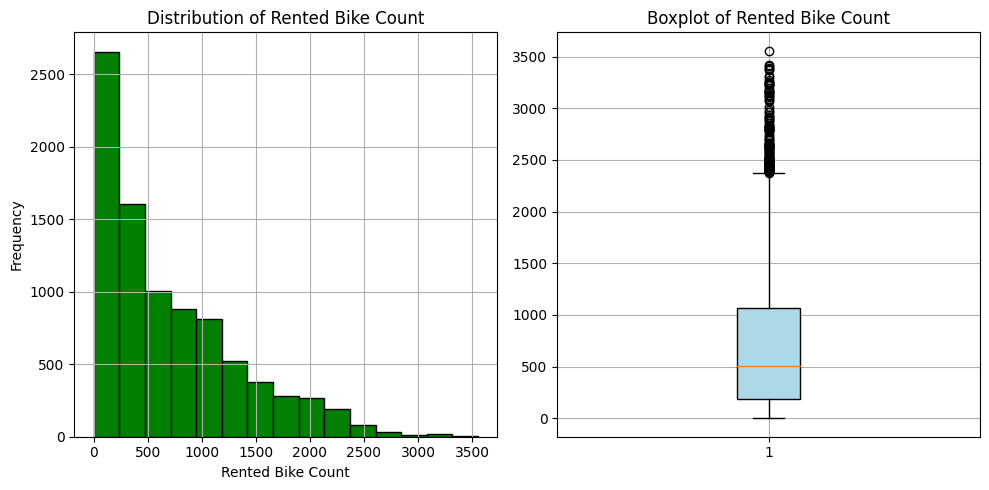

In [24]:
# Chart - 1 visualization code

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Histogram
axs[0].hist(df['Rented Bike Count'], bins=15, color='green', edgecolor='black')
axs[0].set_xlabel('Rented Bike Count')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Rented Bike Count')
axs[0].grid(True)

# Boxplot
axs[1].boxplot(df['Rented Bike Count'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
axs[1].set_title('Boxplot of Rented Bike Count')
axs[1].grid(True)

# Show the plots

plt.tight_layout()

plt.show()



##### 1. Why did you pick the specific chart?

A histogram shows the distribution of counts of a variable whereas a boxplot shows the median, IQR  and outliers.

##### 2. What is/are the insight(s) found from the chart?

The rented bike count is not normally distributed. It is right skewed with a long tail. There are a few counts of very high bike rentals which make the mean to be larger than the median. However, it is not wise to remove all of these high no. of rentals as outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, this chart does not give any insight for creating buissness impact.

#### Chart - 2:  Distributions of weather parameters.

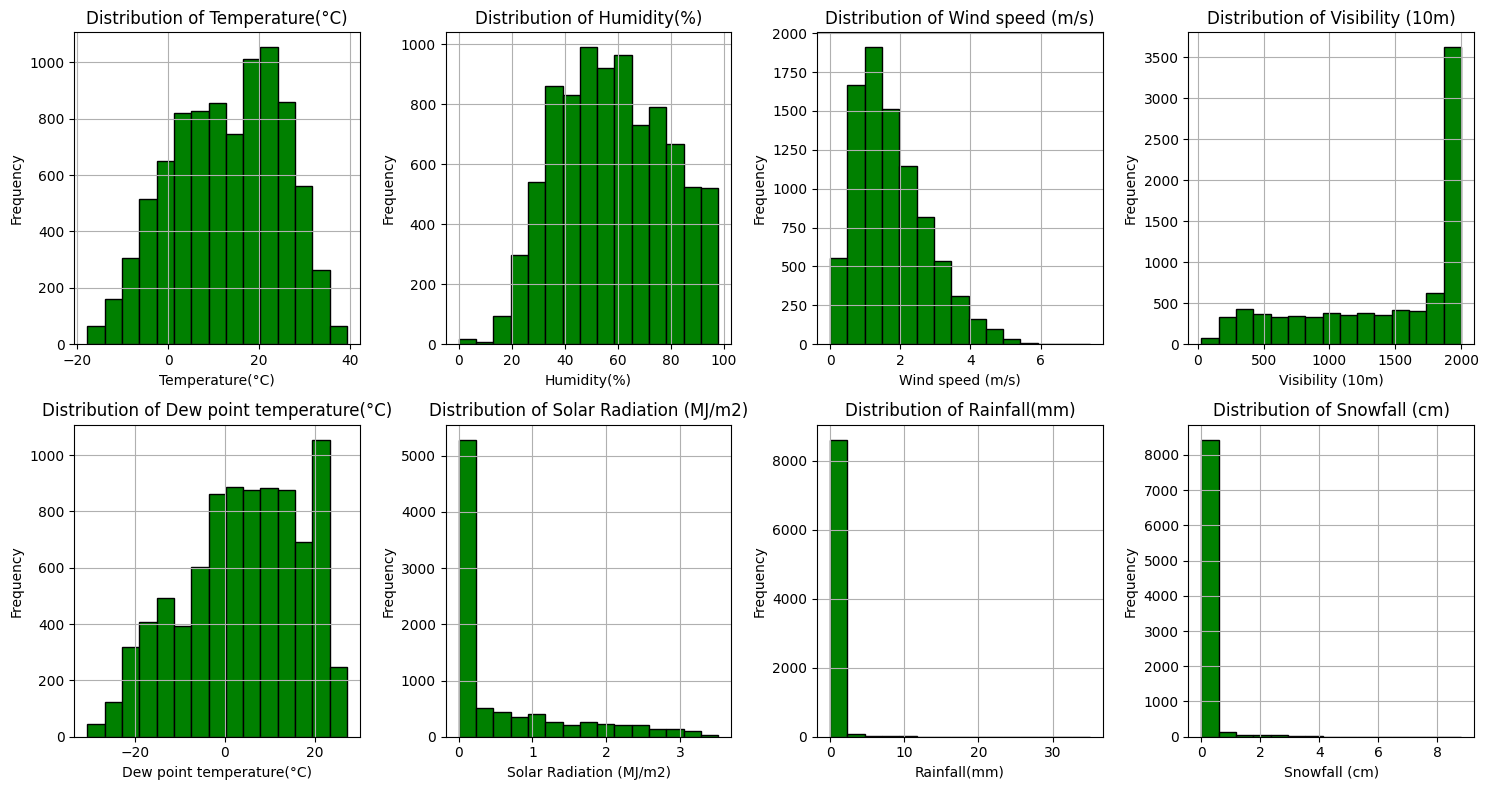

In [25]:
# Chart - 2 visualization code


# Create subplots

fig, axs = plt.subplots(2, 4, figsize=(15, 8))

axs=axs.flatten()

for i, col in enumerate(df.columns[3:11]):

# Histogram
  axs[i].hist(df[col], bins=15, color='green', edgecolor='black')
  axs[i].set_xlabel(col)
  axs[i].set_ylabel('Frequency')
  axs[i].set_title(f'Distribution of {col}')
  axs[i].grid(True)

# Show the plots

plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

A histogram is most suitable the distribution of counts of a variable.

##### 2. What is/are the insight(s) found from the chart?

While some of the weather parameters like temparature, humidity anddew point temparature are normally distributed, others like rainfall, snowfall, solar radiation, windspeedand visibility are not.

This implies that there is a need to transform non-normal distributions before applying linear regression models.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, there is no buissness insight in the above charts.

#### Chart - 3:  Boxplots of weather parameters.

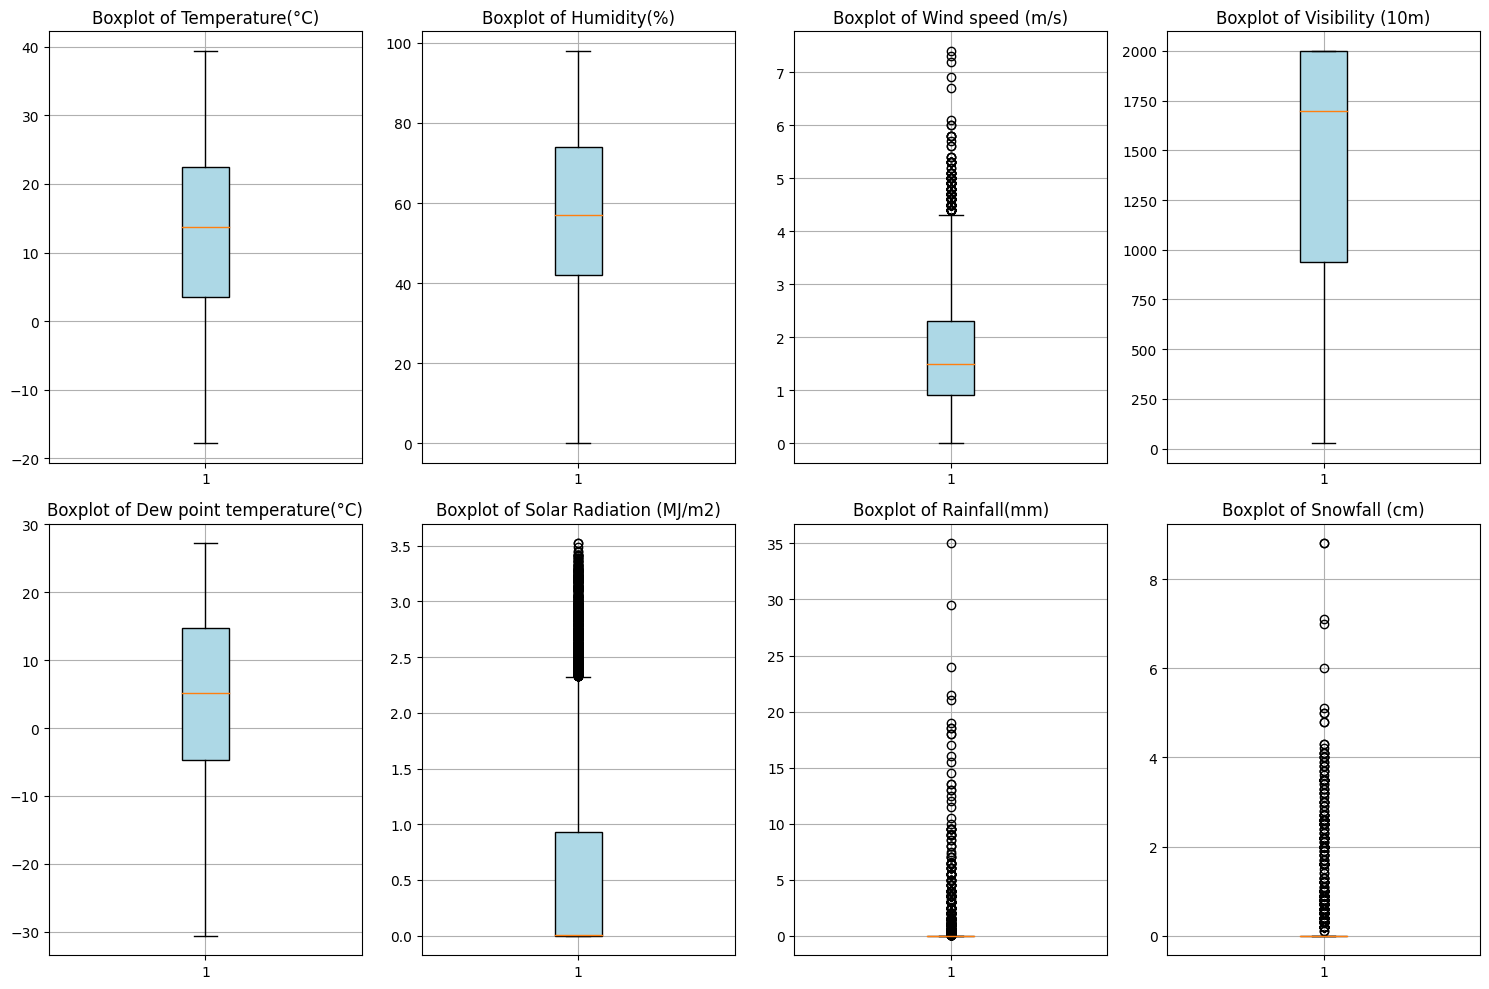

In [26]:
# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

axs=axs.flatten()

for i, col in enumerate(df.columns[3:11]):

# Boxplot
  axs[i].boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='lightblue'))
  axs[i].set_title(f'Boxplot of {col}')
  axs[i].grid(True)

# Show the plots
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

 A boxplot is useful to visualise the median, IQR  and outliers in a distribution.

##### 2. What is/are the insight(s) found from the chart?

There are no outliers in normal distributions like temparature, humidity and dew point temparature but there are significant outliers in skewed distributions. This may be because, the box plot uses IQR method to detect outliers which is not the best method to detect outliers in skewed data.

We will need to apply other outlier detection and handling mechanisms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, there are no buissness insights in these plots.

#### Chart - 4:  Pie chart showing % of days in each season and bar plot showing average hourly  bike rentals per hour in each season

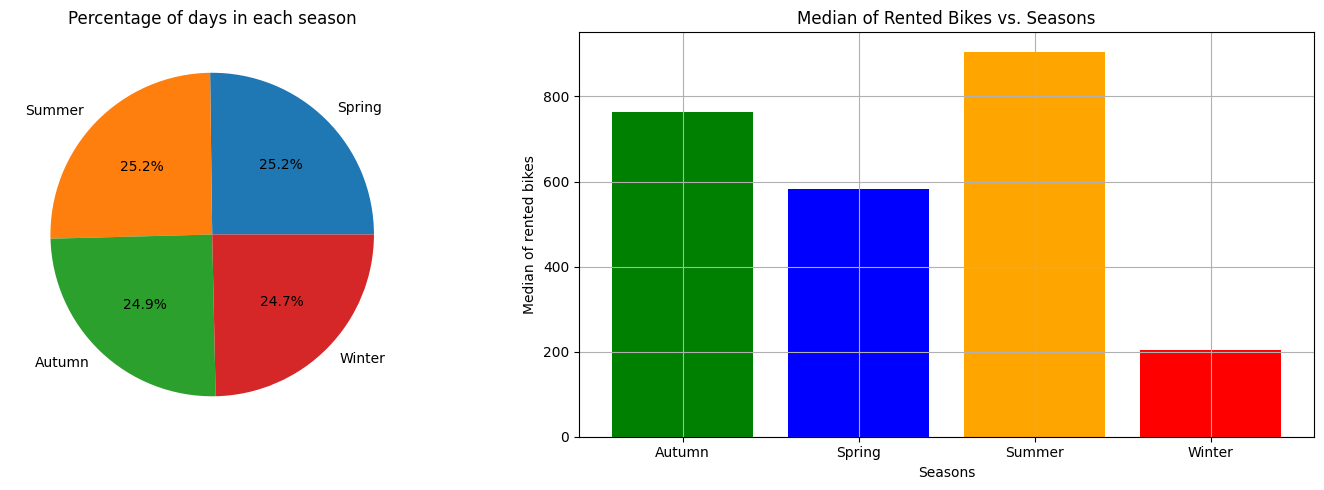

In [27]:
# Chart - 4 visualization code

# Create subplots

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Piechart

axs[0].pie(df['Seasons'].value_counts(), labels=df['Seasons'].value_counts().index , autopct='%1.1f%%')

axs[0].set_title('Percentage of days in each season')


# Barplot
x = df.groupby('Seasons')['Rented Bike Count'].median().index
y = df.groupby('Seasons')['Rented Bike Count'].median()

axs[1].bar(height=y, x=x, color=['green', 'blue', 'orange','red'])
axs[1].set_xlabel('Seasons')
axs[1].set_ylabel('Median of rented bikes')
axs[1].set_title('Median of Rented Bikes vs. Seasons')
axs[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is ideal for showing percentages of a whole whereas a bar plot is used for comparing values across categories.

##### 2. What is/are the insight(s) found from the chart?

Though the number of days in each seson is roughly the same, the median bike rentals are highest in Summer with 900 bikes per hour  and lowest in winter with average of less than 200 bikes per hour in winters.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the bar plot shows us that the bike demand is high in summers and low in winters. So the company needs to account for seasons in their bike fleet management system.


#### Chart - 5 : Pie chart showing % of holidays and bar plot showing average number of bike rentals per hour in holidays and non-holidays

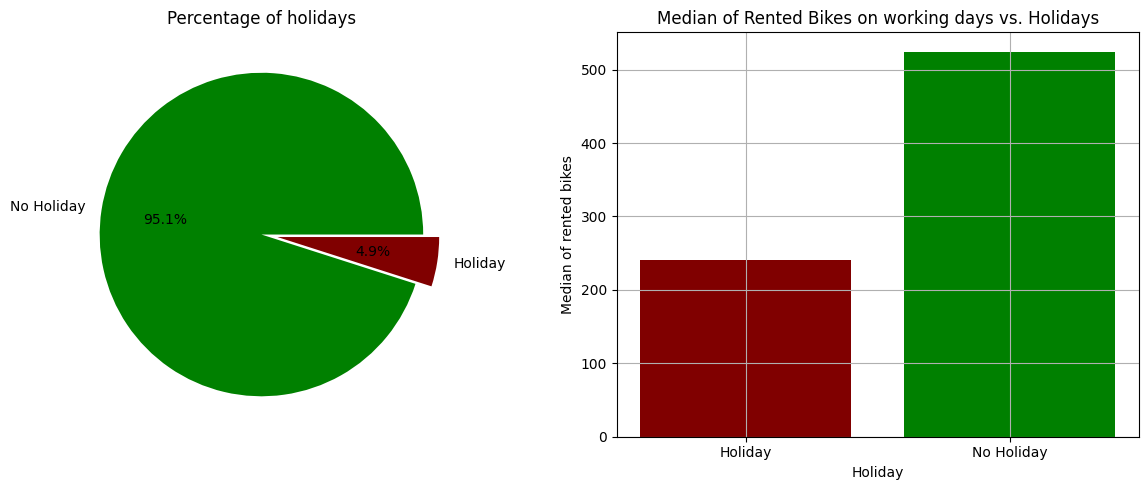

In [28]:
# Chart - 4 visualization code

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
axs[0].pie(df['Holiday'].value_counts(), labels=df['Holiday'].value_counts().index , autopct='%1.1f%%',
           colors=['green', 'maroon'], explode=(0,0.1))

axs[0].set_title('Percentage of holidays')

# Barplot
x = df.groupby('Holiday')['Rented Bike Count'].median().index
y = df.groupby('Holiday')['Rented Bike Count'].median()

axs[1].bar(height=y, x=x, color=['maroon', 'green'])
axs[1].set_xlabel('Holiday')
axs[1].set_ylabel('Median of rented bikes')
axs[1].set_title('Median of Rented Bikes on working days vs. Holidays')
axs[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A pie chart is ideal for showing percentages of a whole whereas a bar plot is used for comparing values across categories.

##### 2. What is/are the insight(s) found from the chart?

About 5% of the total days recorded in the dataset are holidays and the demand for bike rentals is much lesser on holidays, about 250 bikes/ hr compared to working days at more than 500 bikes per hour.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Yes, the bar plot shows us that the bike demand is low on holidays compared to working days. So the company needs to account for holidays in their bike fleet management system.

#### Chart - 6: Hourly and monthly trend of bike rentals

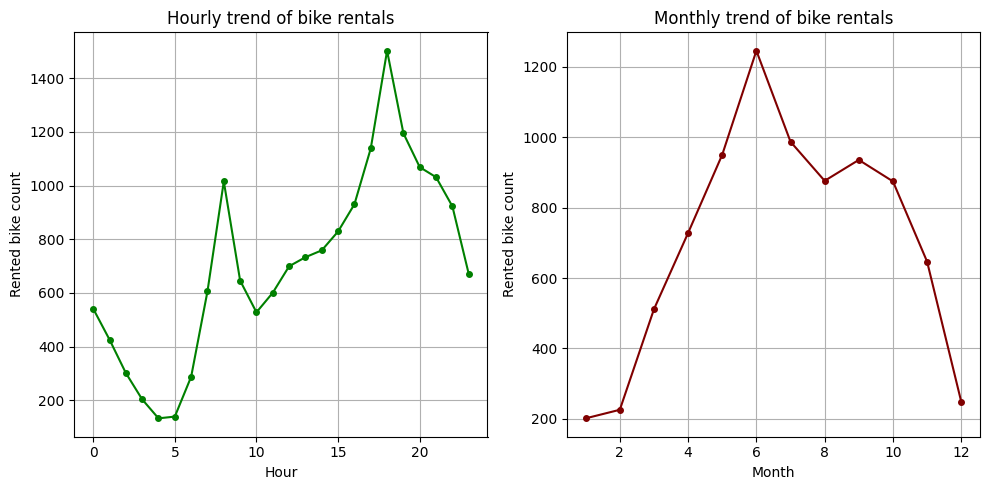

In [29]:
# Chart - 5 visualization code

# creating subplots

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# grouping the data by hour

x_hour = df.groupby('Hour')['Rented Bike Count'].mean().index
y_hour = df.groupby('Hour')['Rented Bike Count'].mean()

# plotting hourly trend

axs[0].plot(x_hour, y_hour, marker='o', markersize=4, color='green')
axs[0].set_xlabel('Hour')
axs[0].set_ylabel('Rented bike count')
axs[0].set_title('Hourly trend of bike rentals')
axs[0].grid()


# grouping the data by month

x_month = df.groupby('Month')['Rented Bike Count'].mean().index
y_month = df.groupby('Month')['Rented Bike Count'].mean()

# plotting monthly trend
axs[1].plot(x_month, y_month, marker='o', markersize=4, color='maroon' )
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Rented bike count')
axs[1].set_title('Monthly trend of bike rentals')
axs[1].grid()

plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?

Line plots are most suitable to visualise trends in time.

##### 2. What is/are the insight(s) found from the chart?

The bike rentals peak at around 9 hrs(1000) and 18hrs(1450) which is the most common office working hours. Whereas, over the course of a year the rentals peak in June, which is Summer and dip in January.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The difference in mean hourlu bike rentals in the course of the day and over the course of a year helps the company plan its logistics. The knowledge of high demand in June and low demand in Dec-Jan will help the company manage its logistics better.

#### Chart - 7 : Scatterplots of weather parameters vs hourly bike rentals

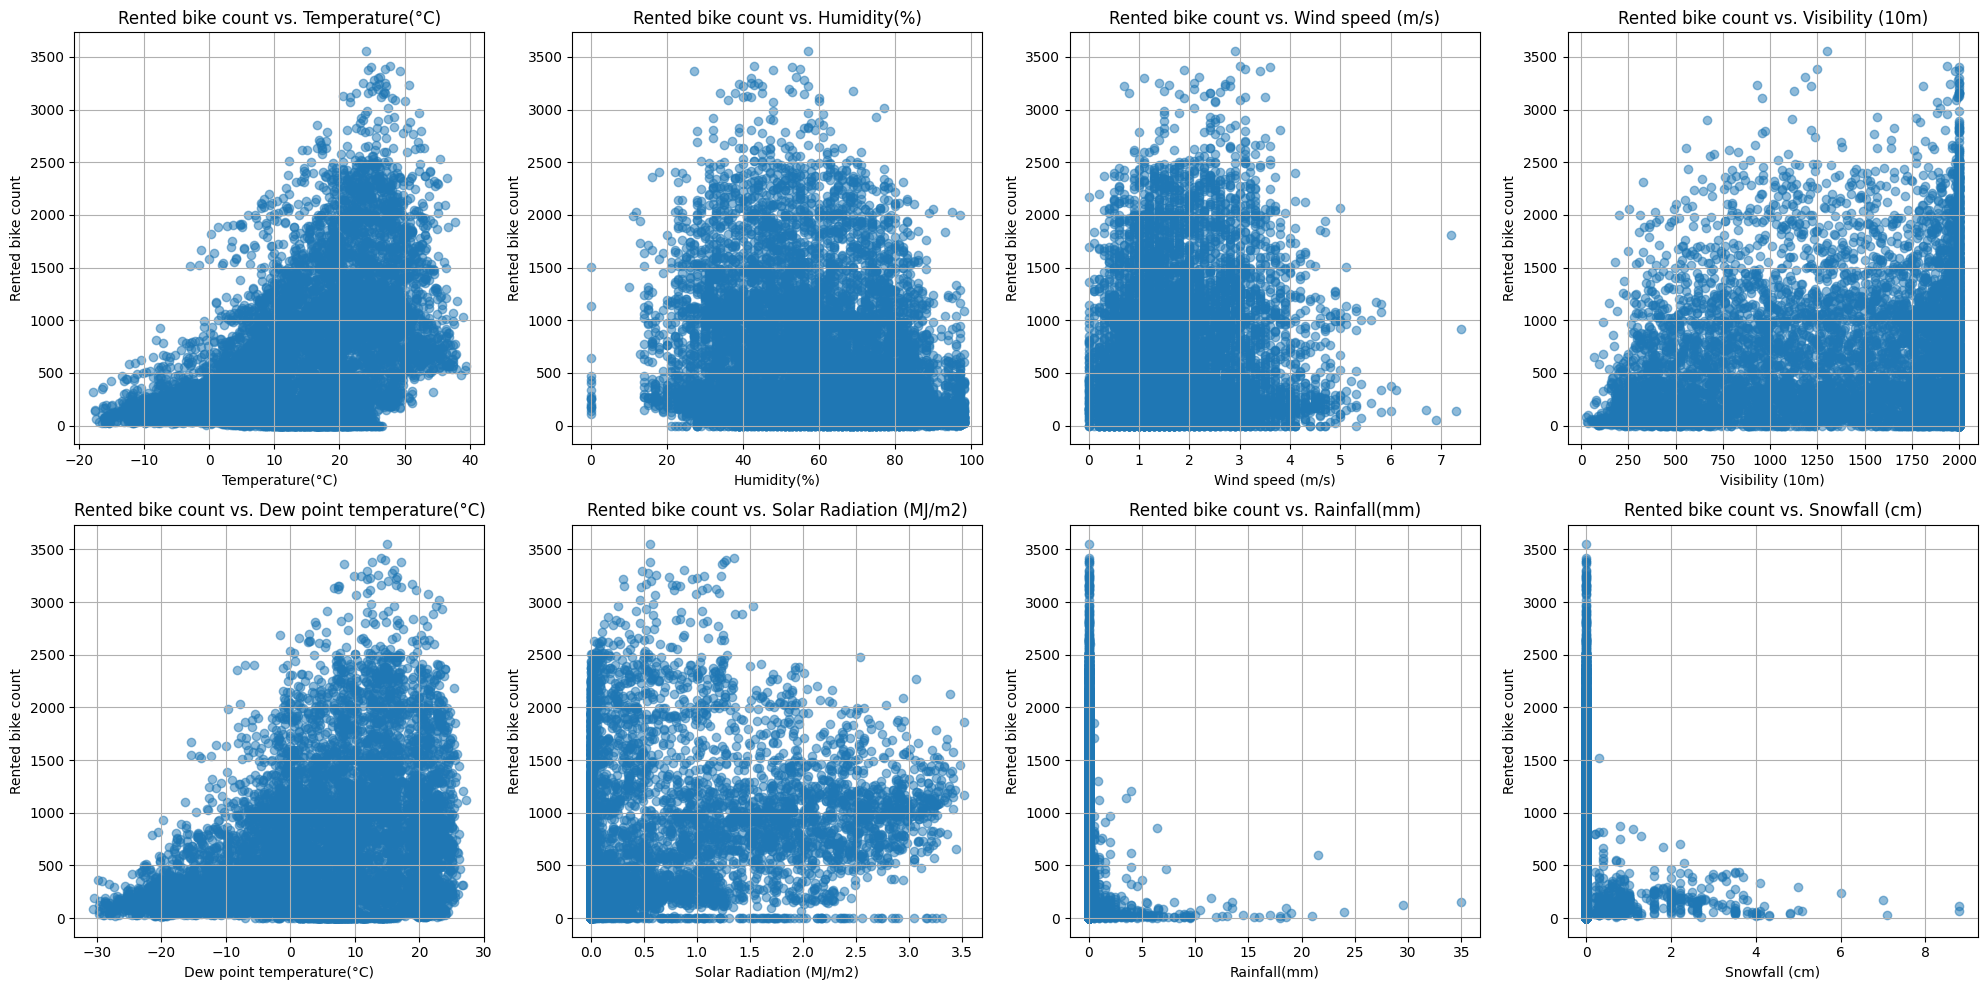

In [30]:
# Chart - 7 visualization code

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

axs=axs.flatten()

for i, col in enumerate(df.columns[3:11]):

# Scatterplots
  #sns.regplot(x=df[col],y=df['Rented Bike Count'], ax =axs[i], line_kws={'color':'red'})
  axs[i].scatter(df[col], df['Rented Bike Count'], alpha=0.5)
  axs[i].set_xlabel(col)
  axs[i].set_ylabel('Rented bike count')
  axs[i].set_title(f'Rented bike count vs. {col}')
  axs[i].grid(True)


# Show the plots
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Scatterplots are useful to visualise the relationship between two contionous variables.

##### 2. What is/are the insight(s) found from the chart?

While few of the weather parameters like temparature, windspeed, dew point temparature and visibility seem to have positive correlation with mean no. of bikes rented, other parameters like humidity, rainfall and snowfall are negatively correlated.

Moreover, all the correlations do not appear to be linear. Therefore, non-linera regression models moght be more suited for this data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. the charts indicate that the bike rentals will depend on various weather parameters in a complex way. It will help the buissness to have a model to predict the demand for bike rentals based on weather parameters.

#### Chart - 8 : Charts showing yearly change temparature

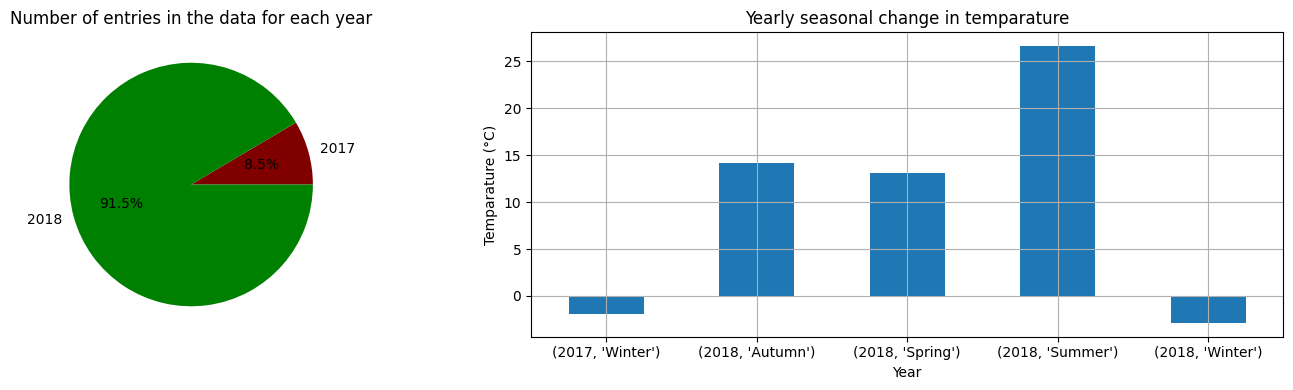

In [31]:
# Chart - 10 visualization code

fig, axs =plt.subplots(1, 2, figsize=(15, 4))

# Plotting the number of entries in the data for each year


axs[0].pie(df.groupby('Year')['Rented Bike Count'].count(), labels=df.groupby('Year')['Rented Bike Count'].count().index , autopct='%1.1f%%',
           colors=[ 'maroon', 'green',])

axs[0].set_title('Number of entries in the data for each year')

# plotting seasonalchange in median temparature

df.groupby(['Year','Seasons'])['Temperature(°C)'].mean().plot(kind='bar', ax=axs[1])
axs[1].set_title('Yearly seasonal change in temparature')
axs[1].set_xlabel('Year')
axs[1].set_xticklabels(labels = df.groupby(['Year','Seasons'])['Temperature(°C)'].mean().index,  rotation=0)
axs[1].set_ylabel('Temparature (°C)')
axs[1].grid(True)

plt.tight_layout()
plt.show()






##### 1. Why did you pick the specific chart?

A pie chart is best to visualise parts of a whole whereas a bar chart is best to compare categories.

##### 2. What is/are the insight(s) found from the chart?

We cannot compare the data based on the year as number of entries for 2017 is much less than entries for 2018. From the bar plot we see that the dataset only has data of a winter season of 2017 and not other seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, there are no buissness insights in this visualisation.

#### Chart - 9 : Correlation Heatmap

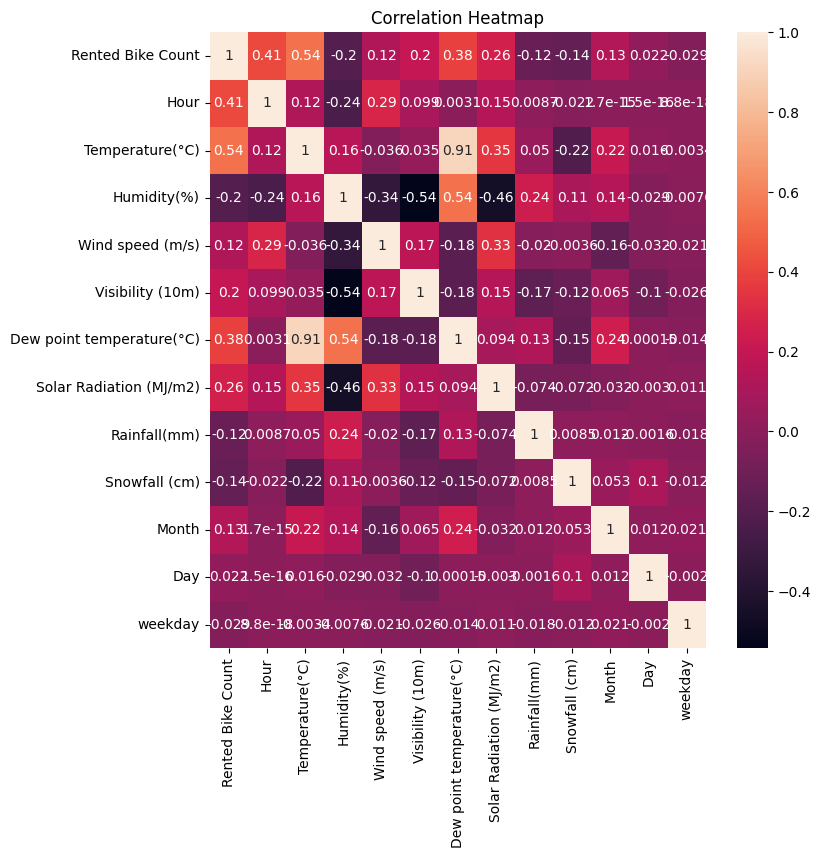

In [32]:
# Correlation Heatmap visualization code

plt.figure(figsize=(8, 8))

# Dropping the non-numeric columns

df_num = df.drop(columns=['Date', 'Seasons', 'Holiday', 'Functioning Day', 'Year'])

#Plotting the heatmap

sns.heatmap(df_num.corr(), annot=True)

plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is useful to visualise the relations between multiple continous numerical variables at once.

##### 2. What is/are the insight(s) found from the chart?

The insights found are:

1. Dew point temparature is highly correllated with temparature with a correlation coefficient of 0.9. Therefore only one of these indicators willsuffice.

2. The day of the month has no significant correlation with any other indicator impliying it can be safely dropped from the data.

3. Humidity, windspeed, visibility and solar radiation are highly correlated with each other and seem to have multicollinearity. This needs to be addressed while training models.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Since statistical tools like t-test and ANOVA assume normal distributions, we first transform any skewed data used in hypothesis testing using boxcox transformation.

### Transforming 'Mean bike Rentals'

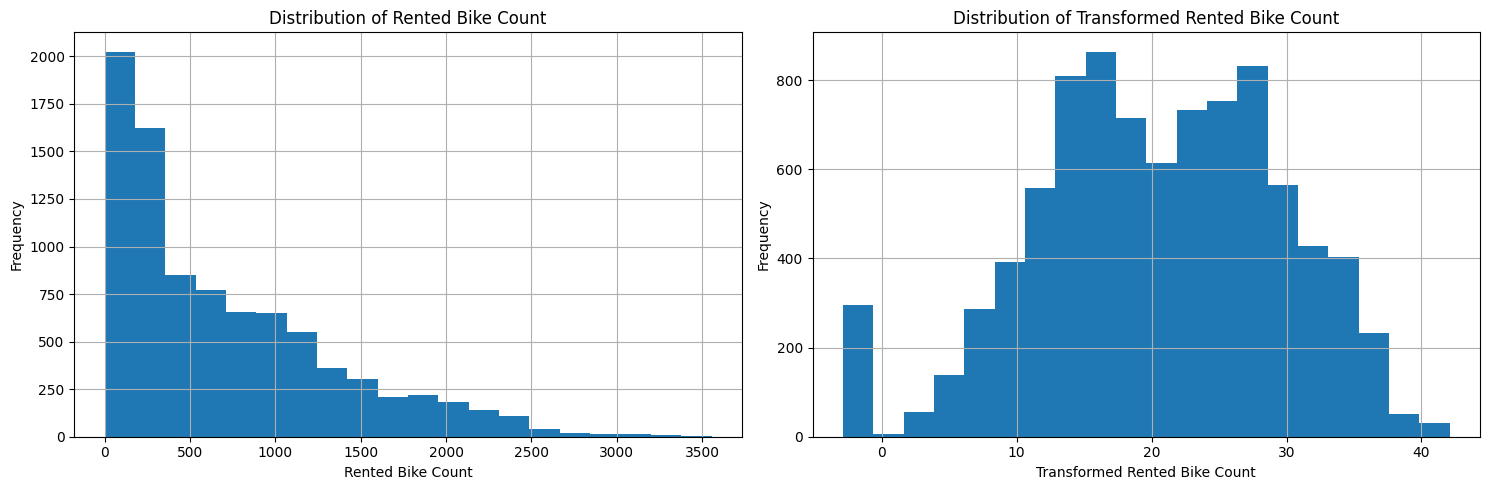

In [33]:
# making a copy of the data

df1 = df.copy()

# Transforming using boxcox

df1.loc[:,'Transformed Rented Bike Count'], flambda = stats.boxcox(df1.loc[:,'Rented Bike Count'] +.0001)

# making subplots

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# plotting the untransformed data

axs[0].hist(df1['Rented Bike Count'], bins=20)
axs[0].set_xlabel('Rented Bike Count')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Rented Bike Count')
axs[0].grid(True)

# plotting the transformed data

axs[1].hist(df1['Transformed Rented Bike Count'], bins=20)
axs[1].set_xlabel('Transformed Rented Bike Count')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Transformed Rented Bike Count')
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Hypothetical Statement - 1  : There is no significant difference in the mean hourly bike rentals on working days vs. holidays.(Effect of holidays on mean hourly bike rentals.)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : There is **no significant difference** in the mean hourly bike rentals on working days vs. holidays.

H1 :  There is a **significant difference** in the mean hourly bike rentals on working days vs. holidays.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform t-test to obtain P-Value

# Making different datasets for holidays and working days

df_holiday = df1[df1['Holiday']=='Holiday']
df_working = df1[df1['Holiday']=='No Holiday']

# Performong t-test to check if there is significant difference in means

t_statistic, p_value = stats.ttest_ind(df_holiday['Transformed Rented Bike Count'], df_working['Transformed Rented Bike Count'])

print("T-statistic:", t_statistic)
print("P-value:", p_value)


# Interpret the result
alpha = 0.05

if p_value < alpha:
    print(f"Reject the null hypothesis: The mean hourly bike rentals vary significantly on holidays vs. working days.")
else:
    print(f"Fail to reject the null hypothesis: The mean hourly bike rentals DO NOT vary significantly on holidays vs. working days.")


T-statistic: -8.367176713922282
P-value: 6.809605257014435e-17
Reject the null hypothesis: The mean hourly bike rentals vary significantly on holidays vs. working days.


##### Which statistical test have you done to obtain P-Value?

We have used the T-test to obtain the p value.

##### Why did you choose the specific statistical test?

T test is most suitable to compare the averages between two independent samples, here the hourly bike rental rates on working days vs holidays.

### Hypothetical Statement - 2: There is no significant difference in the mean hourly bike rental rate in various seasons (Effect of seasons on mean hourly bike rentals)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is **no significant difference** in the mean horly bike rental rate in various seasons.

H1: There is **significant difference** in the mean horly bike rental rate in various seasons.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

# make dfs of various seasons

df_Summer = df1[df1['Seasons']=='Summer']
df_Autumn = df1[df1['Seasons']=='Autumn']
df_Winter= df1[df1['Seasons']=='Winter']
df_Spring = df1[df1['Seasons']=='Spring']


# Performing ANOVA to check if there's significant difference in means

f_statistic, p_value = stats.f_oneway(df_Summer['Transformed Rented Bike Count'], df_Autumn['Transformed Rented Bike Count'],
                                      df_Winter['Transformed Rented Bike Count'], df_Spring['Transformed Rented Bike Count'])
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

# Interpret the result

alpha = 0.05

if p_value < alpha:
    print(f"Reject the null hypothesis: The mean hourly bike rentals vary significantly between seasons.")
else:
    print(f"Fail to reject the null hypothesis: The mean hourly bike rentals DO NOT vary significantly between seasons.")




F-Statistic: 665.7012474065741
P-Value: 0.0
Reject the null hypothesis: The mean hourly bike rentals vary significantly between seasons.


##### Which statistical test have you done to obtain P-Value?

We have performed ANOVA (analysis of variance) to obtain the p value.

##### Why did you choose the specific statistical test?

ANOVA is a statistical method used to test whether the means of three or more independent groups are significantly different from each other. It compares the variance between groups to the variance within groups to see if there is a statistically significant difference.

### Hypothetical Statement - 3: When it rains or snows, the mean hourly bike rental rate is less than 130. (Effect of rain/snow on mean hourly bike rental rate.)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: When it rains or snows, the mean hourly bike rental rate is **less than 120.**

H1: When it rains or snows, the mean hourly bike rental rate is **NOT less than 120.**

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

# Make a df of days on which rainfall or snowfall > 0

df_rain_snow = df1[(df1['Rainfall(mm)']>0) | (df1['Snowfall (cm)']>0)]

# Declare the assumed mean from the hypothesis statement

mu = 120

# Calculate the transformed mean after boxcox transformation

if flambda == 0:
    mu_transformed = np.log(mu)
else:
    mu_transformed = (mu ** flambda - 1) / flambda

# Perform one-tailed t-test to test the hypothesis

t_stat, p_value = stats.ttest_1samp(df_rain_snow['Transformed Rented Bike Count'],mu_transformed)

if t_stat > 0:
    p_value /= 2

print(f"T-statistic: {t_stat}, P-value: {p_value} ")


# Interpret the result
alpha = 0.05

if p_value < alpha:
    print(f"Reject the null hypothesis: The mean hourly bike rentals on rainy/snowy days is not less than 120.")
else:
    print(f"Fail to reject the null hypothesis: The mean hourly bike rentals on rainy/snowy days is less than 120")



T-statistic: -0.5522771977706291, P-value: 0.5808894572222938 
Fail to reject the null hypothesis: The mean hourly bike rentals on rainy/snowy days is less than 120


##### Which statistical test have you done to obtain P-Value?

We have performed a one-tailed t test to obtain p value.

##### Why did you choose the specific statistical test?

This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations is equal or less or greater to the given population mean. The t statistic will be positive when the sample mean is greater than the population mean and negative when the sample mean is less than the population mean.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There are no missing values in the given dataset.

### 2. Handling Outliers

From Chart 3 in above section showing boxplots of various weather parameters, we see that windspeed, solar radiation, rainfall and snowfall have outliers which need to be handled.

In [37]:
# Handling Outliers & Outlier treatments

# Defining a function to detect and handle outliers using modified IQR method

def modified_iqr_outlier_detection(data, k_lower, k_upper):
    # Convert to a pandas Series if it's not already
    if not isinstance(data, pd.Series):
        data = pd.Series(data)

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # Compute the IQR
    IQR = Q3 - Q1

    # Calculate the modified lower and upper bounds
    lower_bound = Q1 -  k_lower * IQR
    upper_bound = Q3 + k_upper * IQR

    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Handle outliers

    # Replace outliers with the median
    cleaned_data = data.where((data >= lower_bound) & (data <= upper_bound), data.median())

    print(f'Upper bound: {upper_bound}, Lower bound = {lower_bound}')

    return  cleaned_data


In [38]:
# Handling outliers in rented bike count

df['Rented Bike Count'] = modified_iqr_outlier_detection(df['Rented Bike Count'], 1.5, 2.5)

Upper bound: 3250.875, Lower bound = -1120.375


In [39]:
# Handling outliers in windspeed

df['Wind speed (m/s)'] = modified_iqr_outlier_detection(df['Wind speed (m/s)'], 1.5, 2.5)

Upper bound: 5.8, Lower bound = -1.1999999999999997


In [40]:
# Handling outliersin solar radiation

df['Solar Radiation (MJ/m2)'] = modified_iqr_outlier_detection(df['Solar Radiation (MJ/m2)'], 1.5, 2.5)

Upper bound: 3.2550000000000003, Lower bound = -1.395


For rainfall and snowfall data, since majority values are zero, we will calculate and handlie outliers of the non-0 data while retaining the zero values as they are.

In [41]:
# Outlier handling for rainfall data

# separating out rainy and non-rainy days

rainfall_df = df[df.loc[:,'Rainfall(mm)'] > 0]

non_rainfall = df[df.loc[:,'Rainfall(mm)'] == 0]

# Outlier treatment for rainfall on rainy days

rainfall_df.loc[:,'Rainfall(mm)'] = modified_iqr_outlier_detection(rainfall_df['Rainfall(mm)'], 1.5, 3.5)

# Merging back rainy and non-rainy days

merged_df = pd.concat([rainfall_df, non_rainfall])


Upper bound: 9.5, Lower bound = -2.5


In [42]:
# Outlier handling for snowfall data

# separating out snowy and nomn-snowy days

snowfall_df = merged_df[merged_df.loc[:,'Snowfall (cm)'] > 0]

non_snowfall = merged_df[merged_df.loc[:,'Snowfall (cm)'] == 0]

# outlier treatment for snowy days

snowfall_df.loc[:,'Snowfall (cm)'] = modified_iqr_outlier_detection(snowfall_df['Snowfall (cm)'], 1.5, 2.5)

# merging back snowy and non-snowy days

modified_df = pd.concat([snowfall_df, non_snowfall])


Upper bound: 6.45, Lower bound = -2.0500000000000003


##### What all outlier treatment techniques have you used and why did you use those techniques?

* We have used modified IQR method to detect outliers. As we have skewed data, Modifying the k value while determining the upper and lower bounds while detecting outliers using IQR method gives more accurate results.

* For rainfall and snowfall, as most values are 0, we have separated out the non-0 values and apllied outlier handling methods on that data while retaining the 0 valued data as it is.

* Once we have detected the outliers, we have replaced them with the median to preserve central tendencies of the data.

### 3. Categorical Encoding

In [43]:
# Encode your categorical columns

# Reloking at the modified df

modified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 120 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   float64       
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holiday  

In [44]:
# seeing the unique values in the categorical variables


print(f'Seasons: {modified_df["Seasons"].unique()}')
print(f'Holiday:{modified_df["Holiday"].unique()}')
print(f'Functioning Day:{modified_df["Functioning Day"].unique()}')



Seasons: ['Winter' 'Autumn' 'Spring' 'Summer']
Holiday:['No Holiday' 'Holiday']
Functioning Day:['Yes' 'No']


In [45]:
# Binary Encoding holiday column

modified_df['Holiday'] = modified_df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

# Binary Encoding functioning day column

modified_df['Functioning Day'] = modified_df['Functioning Day'].map({'Yes': 1, 'No': 0})

In [46]:
# Using Cyclical encoding for year, seasons and weekdays


# Cyclical encoding for weekdays (0-6)
modified_df['weekday_sin'] = np.sin(2 * np.pi * modified_df['weekday'] / 7)
modified_df['weekday_cos'] = np.cos(2 * np.pi * modified_df['weekday'] / 7)

# Cyclical encoding for months (1-12)
modified_df['month_sin'] = np.sin(2 * np.pi * modified_df['Month'] / 12)
modified_df['month_cos'] = np.cos(2 * np.pi * modified_df['Month'] / 12)

# cyclical encoding year(2017-2018)
modified_df['year_sin'] = np.sin(2 * np.pi * modified_df['Year'] / 2)
modified_df['year_cos'] = np.cos(2 * np.pi * modified_df['Year'] / 2)


In [47]:
# Dropping the un-encoded weekday and Month columns

modified_df.drop('weekday', axis=1, inplace=True)
modified_df.drop('Month', axis=1, inplace=True)
modified_df.drop('Year', axis=1, inplace=True)

In [48]:
# Checking the modified_df info after encoding

modified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 120 to 8759
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   float64       
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holiday  

#### What all categorical encoding techniques have you used & why did you use those techniques?

* We have used simple replacement to map holidays and working days to 0 or 1.

* Similarly we have binary encoded functioning and non-functioning days.

* For year, month and weekday, we have used cyclical encoding as they are cyclical in nature

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

There is no textual data in our dataset.

#### 1. Expand Contraction

In [49]:
# Expand Contraction

#### 2. Lower Casing

In [50]:
# Lower Casing

#### 3. Removing Punctuations

In [51]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [52]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [53]:
# Remove Stopwords

In [54]:
# Remove White spaces

#### 6. Rephrase Text

In [55]:
# Rephrase Text

#### 7. Tokenization

In [56]:
# Tokenization

#### 8. Text Normalization

In [57]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [58]:
# POS Taging

#### 10. Text Vectorization

In [59]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### 2. Feature Selection

In [60]:
# Having a look at all the features

modified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 120 to 8759
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   float64       
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holiday  

Seasons are most likely correlated with month of the year and we probably donot need both seasons and month. To check, we see what months do each seasons have and if there's any overlap.

In [61]:
# Grouping by seasons and checking unique values of month

df.groupby('Seasons')['Month'].unique()


,Month
Seasons,
Autumn,"[9, 10, 11]"
Spring,"[3, 4, 5]"
Summer,"[6, 7, 8]"
Winter,"[12, 1, 2]"


##### 2.1 Dropping seasons

In [62]:
# Dropping seasons to reduce redundancy

modified_df.drop('Seasons', axis=1, inplace=True)

##### 2.2 Dropping non-functioning days

In [63]:
# checking to see total rented bikes on functional and non-functional days

modified_df.groupby('Functioning Day')['Rented Bike Count'].sum()

,Rented Bike Count
Functioning Day,
0,0.0
1,6140965.5


As the data of non-functional days, i.e when the company was not functioning is misleading, we remove the non-functional days.

In [64]:
# selecting only the functional days

modified_df = modified_df[modified_df.loc[:,'Functioning Day'] == 1]

# Dropping the column

modified_df.drop('Functioning Day', axis=1, inplace=True)

<ipython-input-64-88d5510343a8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df.drop('Functioning Day', axis=1, inplace=True)


##### 2. 3 Removing Day and Date

As date has been split into day, month and year, it is now redundant.

We have also seen that day of the month is not correlated to any features. So we can drop day too.

In [65]:
# Dropping day and date

modified_df.drop(['Date', 'Day'], axis=1, inplace=True)

<ipython-input-65-7e05654bb7ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df.drop(['Date', 'Day'], axis=1, inplace=True)


##### 2.4 Calculating VIF scores to check for multicollinearity

In [66]:
# Checking for multicollinearity

def calc_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif.sort_values(by='VIF', ascending=False)




In [67]:
calc_vif(modified_df.select_dtypes(include=['float','int']).drop('Rented Bike Count', axis=1))

,feature,VIF
14,year_sin,626.283842
1,Temperature(°C),34.393401
5,Dew point temperature(°C),26.456483
4,Visibility (10m),11.809950
2,Humidity(%),9.917112
13,month_cos,5.836351
3,Wind speed (m/s),4.968058
0,Hour,4.610309
15,year_cos,4.069068
12,month_sin,3.646986


In [68]:
# Manipulate Features to minimize feature correlation and create new features

# Removing year_sin, dewpoint temparature

modified_df.drop(['Dew point temperature(°C)','year_sin'] ,axis=1, inplace=True)

In [69]:
# Recalculating VIF scores

calc_vif(modified_df.select_dtypes(include=['float','int']).drop('Rented Bike Count', axis=1))

,feature,VIF
1,Temperature(°C),15.102512
2,Humidity(%),6.571957
4,Visibility (10m),5.419623
3,Wind speed (m/s),4.867562
0,Hour,4.515520
12,month_cos,4.190264
13,year_cos,4.021412
11,month_sin,2.561617
5,Solar Radiation (MJ/m2),2.461297
7,Snowfall (cm),1.167328


##### What all feature selection methods have you used  and why?

We have used VIF scores and domain knowledge to select features.

##### Which all features you found important and why?

We have found  Hour Temperature(°C)  Humidity(%)  Wind speed (m/s) Visibility (10m) Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) weekday, year    Holiday and  Month to be important features as they describe the weather and working conditions and have no major multicollinearities.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, some of the indicators in the data show significant skewness and need to be transformed to be ableto apply linear regression models. We have used log1p transform as it is robust transformation method and easily interpretible.

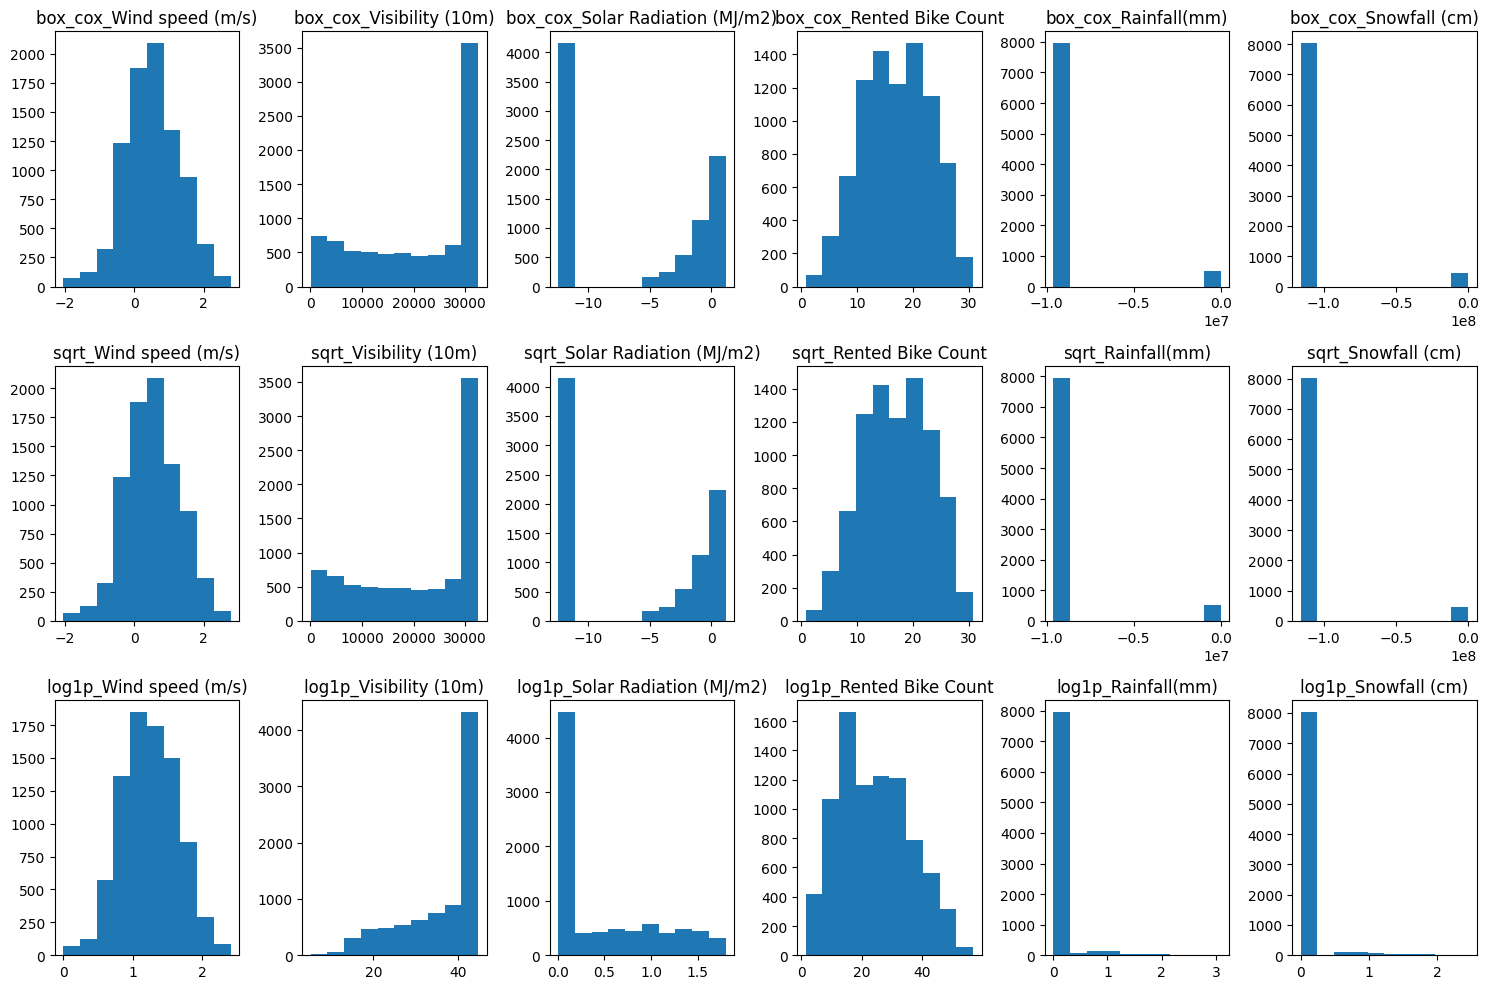

In [70]:
# Transform Your data

# checking which transformation is most suitable

cols = [ 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rented Bike Count', 'Rainfall(mm)', 'Snowfall (cm)']

transformed_df_trial = modified_df.copy()

# Making subplots

fig, axs =plt.subplots(3,6, figsize=(15,10))

axs = axs.flatten()

for i, col in enumerate(cols):

# doing boxcox, sqrt and log1p transformations

  transformed_df_trial.loc[:,f'box_cox_transformed_{col}'],f = stats.boxcox(transformed_df_trial.loc[:,col]+.00001)

  transformed_df_trial.loc[:,f'sqrt_transformed_{col}'] = np.sqrt(transformed_df_trial.loc[:,col]+.00001)

  transformed_df_trial.loc[:,f'log_transformed_{col}'] = np.log1p(transformed_df_trial.loc[:,col]+.00001)


# plotting

  axs[i].hist(transformed_df_trial[f'box_cox_transformed_{col}'])
  axs[i].set_title(f'box_cox_{col}')
  axs[i+6].hist(transformed_df_trial[f'box_cox_transformed_{col}'])
  axs[i+6].set_title(f'sqrt_{col}')
  axs[i+12].hist(transformed_df_trial[f'sqrt_transformed_{col}'])
  axs[i+12].set_title(f'log1p_{col}')




plt.tight_layout()
plt.show()







We observe that only bike rentals and windspeed have been transformed to normal distributions by any of these methods.

We choose sqrt transformation because of its easy interpretability.

In [71]:
# Applying sqrt to bike rentals and winsdpeed


transformed_df = modified_df.copy()


transformed_df.loc[:,'transformed_bike_count'] = np.sqrt(transformed_df.loc[:,'Rented Bike Count']+.00001)

transformed_df.loc[:,'transformed_wind_speed'] = np.sqrt(transformed_df.loc[:,'Wind speed (m/s)']+.00001)

From the visualisations, we know that a linear model might not be the best fit. However, due to its simplicity and low computational demands, we want to give linear regression and distance based models like SVM a fighting chance.

Applying alternate techniques to transform the other indicators.

We use binning to convert visibilty and solar radiation to categorical variables and divide the rainfall and snowfall into binary variables with 0 and 1.

In [72]:
# Binning the visibility and solar radiation indicators

num_bins = 4

transformed_df['Visibility_bins'] = pd.cut(transformed_df['Visibility (10m)'], bins=num_bins, labels=False)

transformed_df['Solar Radiation_bins'] = pd.cut(transformed_df['Solar Radiation (MJ/m2)'], bins=num_bins, labels=False)

In [73]:
# Checking the medians of the different categories

visibility_medians =  transformed_df.groupby('Visibility_bins')['Rented Bike Count'].median()

radiation_medians =  transformed_df.groupby('Solar Radiation_bins')['Rented Bike Count'].median()

print(visibility_medians, radiation_medians)


Visibility_bins
0    230.5
1    515.5
2    584.5
3    652.0
Name: Rented Bike Count, dtype: float64 Solar Radiation_bins
0     369.0
1     812.0
2     955.0
3    1012.0
Name: Rented Bike Count, dtype: float64


In [74]:
# converting rainfall and snowfall into binary variables

transformed_df['binary_rainfall'] = np.where(transformed_df['Rainfall(mm)'] > 0, 1, 0)


transformed_df['binary_snowfall'] = np.where(transformed_df['Snowfall (cm)'] > 0, 1, 0)


In [75]:
rainfall_medians =  transformed_df.groupby('binary_rainfall')['Rented Bike Count'].median()

snowfall_medians =  transformed_df.groupby('binary_snowfall')['Rented Bike Count'].median()

print(rainfall_medians, snowfall_medians)

binary_rainfall
0    589.0
1     71.0
Name: Rented Bike Count, dtype: float64 binary_snowfall
0    586.0
1    149.0
Name: Rented Bike Count, dtype: float64


In [76]:
# Retaining only the transformed columns

transformed_df.drop(['Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Rented Bike Count', 'Wind speed (m/s)' ], axis=1, inplace=True)


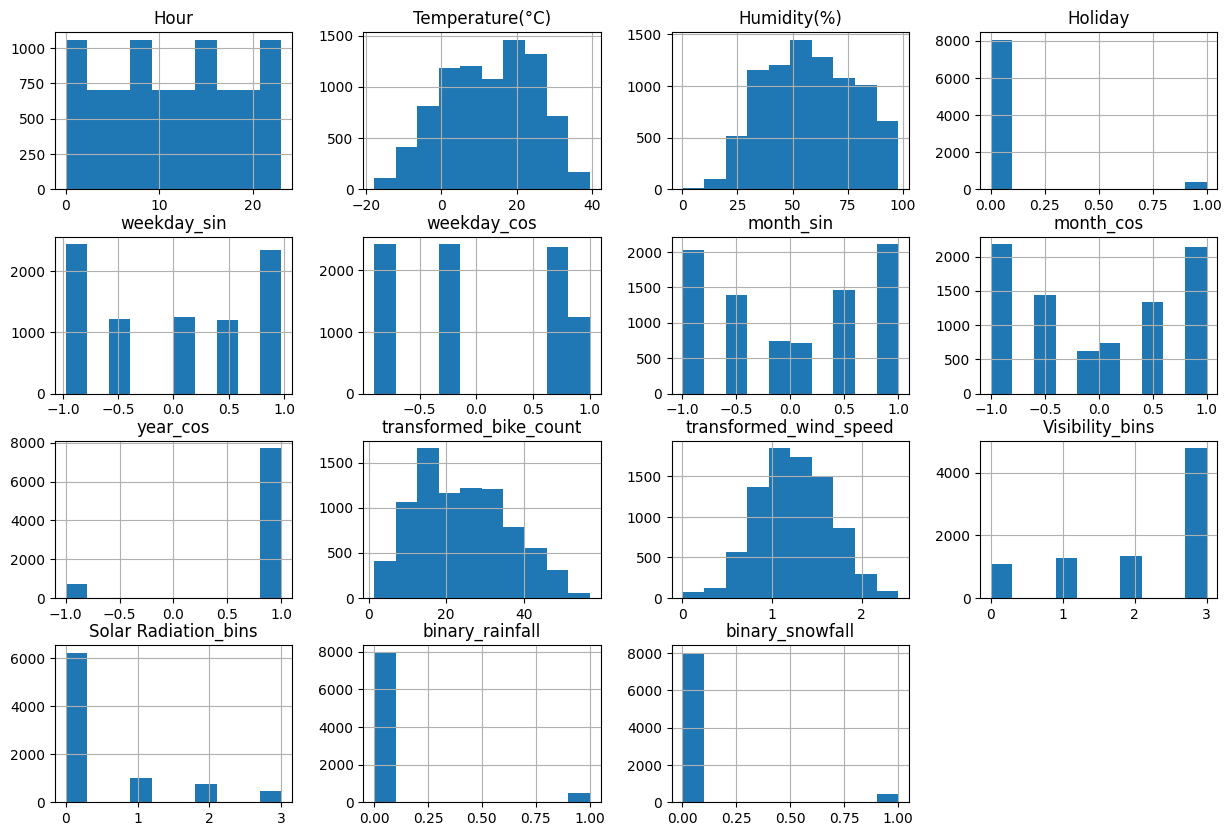

In [77]:
# Checking the distributions of all indicators in transformed_df

transformed_df.hist(figsize=(15,10))
plt.show()

### 6. Data Scaling

We use standard scaler for all the normally distributed indicators except the target variable to retain interpretability of the results.

In [78]:
# Scaling your data

cols = [ 'Temperature(°C)', 'Humidity(%)',  'transformed_wind_speed' ]


for col in cols:

  transformed_df.loc[:,f'scaled_{col}'] = StandardScaler().fit_transform(transformed_df[[col]])

  transformed_df.drop(col, axis=1, inplace=True)


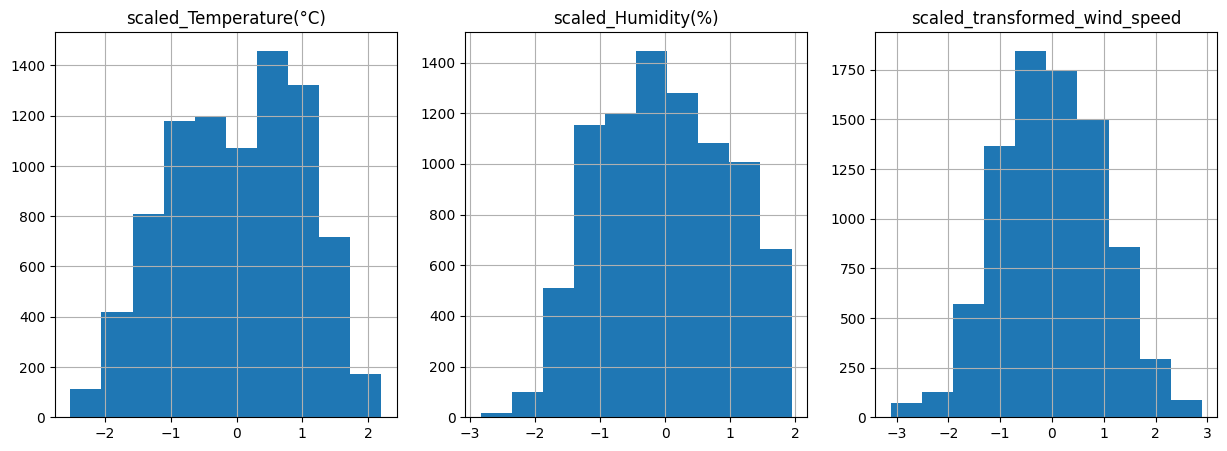

In [79]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for i, col in enumerate(cols):
  axs[i].hist(transformed_df[f'scaled_{col}'])
  axs[i].set_title(f'scaled_{col}')
  axs[i].grid(True)

plt.show()

##### Which method have you used to scale you data and why?

We have used standard scaler as it is suitable for scaling normally distributed data to have a mean of 0 and standard deviation of 1.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, I don't think dimensionality reduction is needed for this dataset as the number of indicators(12) are quite manageable.

### 8. Data Splitting

In [80]:
# Split your data to train and test. Choose Splitting ratio wisely.

# defining indicator and target datasets

X = transformed_df.drop( 'transformed_bike_count', axis=1)

Y = transformed_df['transformed_bike_count']


# Creating the testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [81]:
# Display the shapes of the resulting datasets

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training set shape:", y_train.shape)
print("Test set shape:", y_test.shape)

Training set shape: (6348, 14)
Test set shape: (2117, 14)
Training set shape: (6348,)
Test set shape: (2117,)


##### What data splitting ratio have you used and why?

We have used an 80:20 splitting ratio as it gives a good balance of variance in parameters and variance in predicted results.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

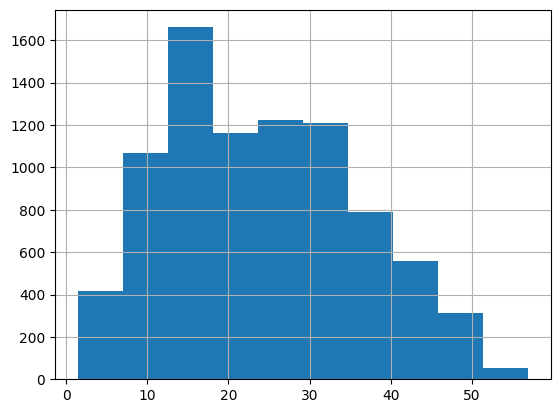

In [82]:
# Handling Imbalanced Dataset (If needed)

Y.hist()
plt.show()

As our target variable is continous, we do not have an imbalanced dataset.

### 10.  Viewing the final dataset to be used for modelling

In [83]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 120 to 8759
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Hour                           8465 non-null   int64  
 1   Holiday                        8465 non-null   int64  
 2   weekday_sin                    8465 non-null   float64
 3   weekday_cos                    8465 non-null   float64
 4   month_sin                      8465 non-null   float64
 5   month_cos                      8465 non-null   float64
 6   year_cos                       8465 non-null   float64
 7   transformed_bike_count         8465 non-null   float64
 8   Visibility_bins                8465 non-null   int64  
 9   Solar Radiation_bins           8465 non-null   int64  
 10  binary_rainfall                8465 non-null   int64  
 11  binary_snowfall                8465 non-null   int64  
 12  scaled_Temperature(°C)         8465 non-null   floa

## ***7. ML Model Implementation***

Before implementing models, we would like to know the time it took to execute different models as it plays an important role in model selection. Therefore we create a wrapper function to calculate execution times.

In [84]:
# Wrapper function tocalculate execution times


def timer(func):
    """Decorator to time the execution of a function."""
    def wrapper(*args, **kwargs):
        #execution_times = [a,b]
        start_time = time.time()  # Start time
        result = func(*args, **kwargs)  # Call the function
        end_time = time.time()  # End time
        elapsed_time = end_time - start_time  # Calculate elapsed time
        time_elapsed = round(elapsed_time,4)
        # print(f"Execution time of {func.__name__}: {elapsed_time:.4f} seconds")
        return result, time_elapsed
    return wrapper

Next, we would like to create a dataframe to store the evaluation metrics and execution times of different models

In [85]:
# Creating an evaluation metrics dataframe to store metrics of different models

evaluation_metrics = pd.DataFrame(index =['MSE', 'MAE', 'R2', 'time_taken'])

In [86]:
evaluation_metrics.head()

""
MSE
MAE
R2
time_taken


### ML Model - 0 : Baseline Model

We begin by creating a baseline model so that we can evaluate the performance of different models against this simple baseline model.

In [87]:
# ML Model - 0 Implementation

@timer
def train_baseline_model(X_train, y_train):

  # Create and fit the model

    model = np.median(y_train)

    return model

@timer
def evaluate_model(model, X_test, y_test):

    # Generate predictions for the test set

    y_pred = np.full_like(y_test, model)

    # Evaluate the model

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, mae, r2

# Train and evaluate Baseline Model

baseline_model, bl_ft = train_baseline_model(X_train, y_train)

[bl_mse, bl_mae, bl_r2], bl_pt = evaluate_model(baseline_model, X_test, y_test)

total_time = bl_ft + bl_pt

# Update the evaluation_metrics df

evaluation_metrics['Baseline'] = [bl_mse,bl_mae, bl_r2,total_time]

# Print the evaluation metrics_df

evaluation_metrics.head()

,Baseline
MSE,143.845006
MAE,10.083264
R2,-0.002300
time_taken,0.004200


### ML Model - 1 : Linear Regression

In [88]:
# ML Model - 1 Implementation

# Defining functions to fit and evaluate models with the time wrapper

@ timer
def fit_model(X_train, y_train, selected_model):

   # Create and fit the model

    fitted_model =  selected_model.fit(X_train, y_train)

    return fitted_model

@timer
def evaluate_model(fitted_model, X_test, y_test):

    # Predict on the model

    y_pred = fitted_model.predict(X_test)

    # Evaluate the model

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return y_pred, mse, mae, r2



In [89]:
# Train and evaluate Linear Regression

selected_model = LinearRegression()

lr_model, lr_ft = fit_model(X_train,y_train, selected_model)

[y_pred, lr_mse, lr_mae, lr_r2], lr_pt = evaluate_model(lr_model, X_test, y_test)


# Update the evaluation_metrics df

evaluation_metrics['Linear Regression'] = [lr_mse, lr_mae, lr_r2,lr_ft+lr_pt]

In [90]:
# Visualizing evaluation Metric Score chart and the residuals

# Defining a function to plot the scatter and residual plots

def plot_scatter_residuals(y_test, y_pred, mse, mae, r2):

# Create scatter plot

  fig, axs = plt.subplots(1, 2, figsize=(12, 4
                    ))
  axs[0].scatter(y_pred, y_test)
  axs[0].plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], 'k--', lw=2)
  axs[0].set_xlabel('Predicted values')
  axs[0].set_ylabel('Actual values')
  axs[0].set_title('Scatter plot of predicted vs actual values')
  axs[0].grid(True)

# Add evaluation metrics to plot
  axs[0].text(-2, 40, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}', fontsize=13, ha='left')


  # Calculate residuals
  residuals = y_test - y_pred


  sns.lineplot(x=list(range(1, len(residuals)+1)), y=residuals, ax=axs[1])
  axs[1].set_xlabel('Residuals')
  axs[1].set_ylabel('Residuals')
  axs[1].set_title('Residuals plot')


  plt.grid(True)
  plt.show()

  return


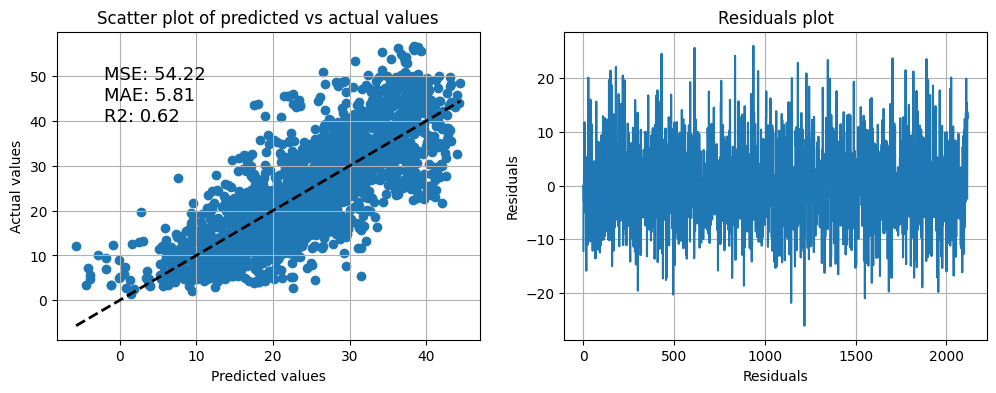

In [91]:
# plotting the scatter and residal; plots for linear regression

plot_scatter_residuals(y_test, y_pred, lr_mse, lr_mae, lr_r2)

We see that the residuals are centered around 0 and have a constant variance.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data.


In [92]:
# Print the evaluation metrics_df

evaluation_metrics.head()

,Baseline,Linear Regression
MSE,143.845006,54.220447
MAE,10.083264,5.814104
R2,-0.002300,0.622197
time_taken,0.004200,0.036800


We see that linear regression performs considerably well compared to a baseline model.

The mean Absolute error is about 5.8 which is low for our transformed data ranging about [0 to 55]. This implies that there is a mean error range of +_ 36 bikes (as we applied sqrt transformation on bike count, we have to reverse it, i.e square the resultant value) in the estimated model.

However, the R2 measure is only 0.63, which implies that the model is able to explian only 63% of the variance in test data. This implies that our linear model is unable to capture the underlying complexities of the data.

We have not applied the better boxcox transformation or scaled the target variable to retain interpretability.

We next see if scaling improves the model significantly enough to afford losing easy interpretability.



In [93]:
# boxcox transformed scaled target variable

transformed_df_2 = transformed_df.copy()


transformed_df_2.loc[:,'transformed_bike_count'],f = stats.boxcox(modified_df.loc[:,'Rented Bike Count']+.00001)

transformed_df_2.loc[:,f'scaled_transformed_bike_count'] = StandardScaler().fit_transform(transformed_df_2[['transformed_bike_count']])

transformed_df_2.drop('transformed_bike_count', axis=1, inplace=True)

#transformed_df_2.hist()

#plt.show()

In [94]:
## Splitting scaled y data into training and testing

# Split your data to train and test. Choose Splitting ratio wisely.

# defining indicator and target datasets

X_1 = transformed_df_2.drop( 'scaled_transformed_bike_count', axis=1)

Y_1 = transformed_df_2['scaled_transformed_bike_count']


# Creating the testing and training sets

X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, Y_1, test_size=0.25, random_state=42)

In [95]:
# Train and evaluate Linear Regression on scaled y data

selected_model = LinearRegression()

lr1_model, lr1_ft = fit_model(X1_train,y1_train, selected_model)

[y1_pred, lr1_mse, lr1_mae, lr1_r2], lr1_pt = evaluate_model(lr1_model, X1_test, y1_test)


# Update the evaluation_metrics df

evaluation_metrics['Linear Regression_ scaled y'] = [lr1_mse, lr1_mae, lr1_r2,lr1_ft+lr1_pt]

In [96]:
evaluation_metrics.head()

,Baseline,Linear Regression,Linear Regression_ scaled y
MSE,143.845006,54.220447,0.370069
MAE,10.083264,5.814104,0.481659
R2,-0.002300,0.622197,0.640492
time_taken,0.004200,0.036800,0.024700


We see that scaling y only slightly improves the model with r2 improving from 0.62 to 0.65.

Therefore, we continue with unscaled y data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [97]:

# In simple linear regression, there are no hyperparameters.

# cross validation

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Store the results
mse_list = []
mae_list = []
r2_list = []

# K-fold Cross Validation

selected_model = LinearRegression()

@ timer
def kfold_cv(X , y , k):

  for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model

    fitted_model = fit_model(X_train, y_train, selected_model)[0]

    # Evaluate the model

    [y_pred, mse, mae, r2]= evaluate_model(fitted_model, X_test, y_test)[0]

    # Appending to the lists

    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

  return mse_list, mae_list, r2_list



[mse_list, mae_list, r2_list], time_taken  = kfold_cv(X,Y,k)


# Calculate the average metrics

avg_mse = np.mean(mse_list)
avg_mae = np.mean(mae_list)
avg_r2 = np.mean(r2_list)

# Update the evaluation_metrics df

evaluation_metrics['Linear_Regression_CV'] = [avg_mse, avg_mae, avg_r2,time_taken]



##### Which hyperparameter optimization technique have you used and why?

There are no hyperparameters in linear regression.

However, we have used cross-validation to see if theres any improvement in the model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [98]:
evaluation_metrics.head()

,Baseline,Linear Regression,Linear Regression_ scaled y,Linear_Regression_CV
MSE,143.845006,54.220447,0.370069,52.446270
MAE,10.083264,5.814104,0.481659,5.683640
R2,-0.002300,0.622197,0.640492,0.622926
time_taken,0.004200,0.036800,0.024700,0.249400


No, we have not seen any improvement in the model predictions even after k-fold cross validation.

### ML Model - 2 : Ridge Regression

In [99]:
# Create and fit the Ridge regression model

alpha = 1.0  # Regularization strength

selected_model = Ridge(alpha=alpha)

# Train and evaluate Linear Regression

rr_model, rr_ft = fit_model(X_train, y_train, selected_model )

[y_pred, rr_mse, rr_mae, rr_r2], rr_pt = evaluate_model(rr_model, X_test, y_test)


# Update the evaluation_metrics df

evaluation_metrics['Ridge Regression'] = [rr_mse, rr_mae, rr_r2,rr_ft+rr_pt]

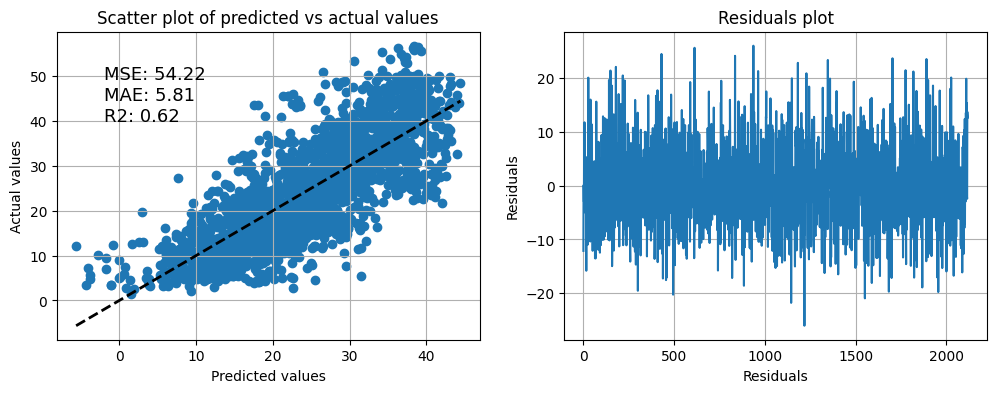

In [100]:
# Visualizing evaluation Metric Score chart of Ridge Regression

plot_scatter_residuals(y_test, y_pred, rr_mse, rr_mae, rr_r2)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Ridge regression is a type of linear regression that incorporates L2 regularization to prevent overfitting, especially when dealing with multicollinearity.

In [101]:
evaluation_metrics.head()

,Baseline,Linear Regression,Linear Regression_ scaled y,Linear_Regression_CV,Ridge Regression
MSE,143.845006,54.220447,0.370069,52.446270,54.219348
MAE,10.083264,5.814104,0.481659,5.683640,5.814185
R2,-0.002300,0.622197,0.640492,0.622926,0.622204
time_taken,0.004200,0.036800,0.024700,0.249400,0.043300


From the evaluation metrics, we see that the MAE of Ridge Regression is 5.8 and R2 score is .63 which is not an improvement from the linear regression model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [102]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)



ridge_model = Ridge()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': np.logspace(-4, 4, 10)  # Values from 0.0001 to 10000
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

selected_model_ridge = grid_search

# Fit GridSearchCV

fit_results,rrcv_ft = fit_model(X_train, y_train, selected_model_ridge)


# Get the best model from GridSearchCV
best_model_ridge = selected_model_ridge.best_estimator_


[y_pred, rrcv_mse, rrcv_mae, rrcv_r2], rrcv_pt = evaluate_model(best_model_ridge, X_test, y_test)


# Update the evaluation_metrics df

evaluation_metrics['Ridge Regression_CV'] = [rrcv_mse, rrcv_mae, rrcv_r2,rrcv_ft+rrcv_pt]


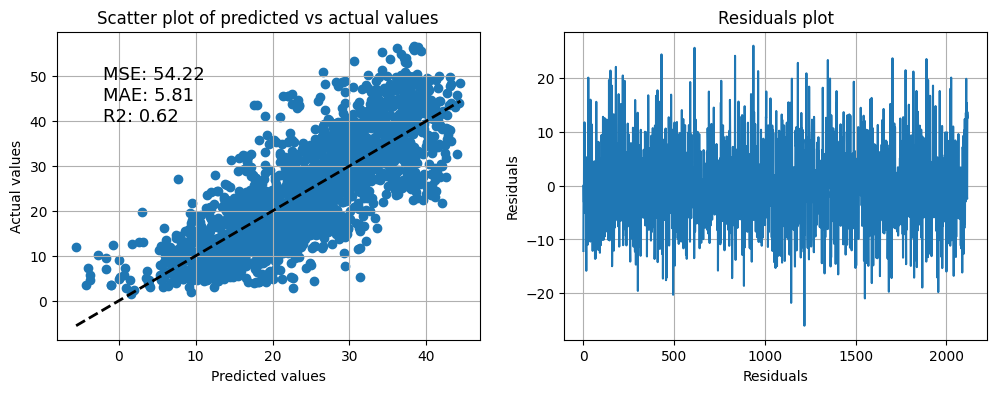

In [103]:
plot_scatter_residuals(y_test, y_pred, rrcv_mse, rrcv_mae, rrcv_r2)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV which runs through the entire grid of parameters for finding the optimal hyperparameters and does cross validation along with it.

We have selected this technique as our training time taken and  parameter space are quite small and it won't take too much time to run through each parameter.





##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [104]:
evaluation_metrics.head()

,Baseline,Linear Regression,Linear Regression_ scaled y,Linear_Regression_CV,Ridge Regression,Ridge Regression_CV
MSE,143.845006,54.220447,0.370069,52.446270,54.219348,54.217883
MAE,10.083264,5.814104,0.481659,5.683640,5.814185,5.814352
R2,-0.002300,0.622197,0.640492,0.622926,0.622204,0.622214
time_taken,0.004200,0.036800,0.024700,0.249400,0.043300,2.997000


No, we havent seen any improvement with hyperparameter tuning.
the R2 score still remains at 0.63. However, the time taken to implement sees a drastic increase from .02s to 0.6s.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**R2 (R-squared):**

* R2 measures how much of the variance in the target variable is explained by the model. A high R2 score indicates that the model is able to capture a large portion of the variance in the target variable, and therefore is a good fit for the data.

* From a business perspective, a high R2 score can indicate that the model is accurately predicting the target variable, which can be valuable for decision-making purposes.


**MSE (Mean Squared Error):**

* MSE measures the average squared difference between the predicted and actual values. A low MSE score indicates that the model's predictions are close to the actual values.

* From a business perspective, a low MSE score can indicate that the model is making accurate predictions, which can be valuable for decision-making purposes.

**MAE (Mean Absolute Error):**

* MAE measures the average absolute difference between the predicted and actual values. Like MSE, a low MAE score indicates that the model's predictions are close to the actual values. However, MAE is less sensitive to outliers than MSE.

* From a business perspective, a low MAE score can indicate that the model is making accurate predictions across a wide range of values, which can be valuable for decision-making purposes.

Overall, these evaluation metrics can help a business to assess the performance of a machine learning model and its potential impact on business outcomes. By selecting the appropriate metrics and optimizing the model accordingly, businesses can build models that are well-suited to their specific needs and goals.

### ML Model - 3 : Decision Tree

In [105]:
# ML Model - 3 Implementation


selected_model = DecisionTreeRegressor(max_depth=8, max_features=9, max_leaf_nodes=100, random_state=42)


# Fit the Algorithm

dt_model, dt_ft = fit_model(X_train, y_train, selected_model )

# Train and evaluate decision Tree

[y_pred, dt_mse, dt_mae, dt_r2], dt_pt = evaluate_model(dt_model, X_test, y_test)


# Update the evaluation_metrics df

evaluation_metrics['DecisionTree Regression'] = [dt_mse, dt_mae, dt_r2,dt_ft+dt_pt]



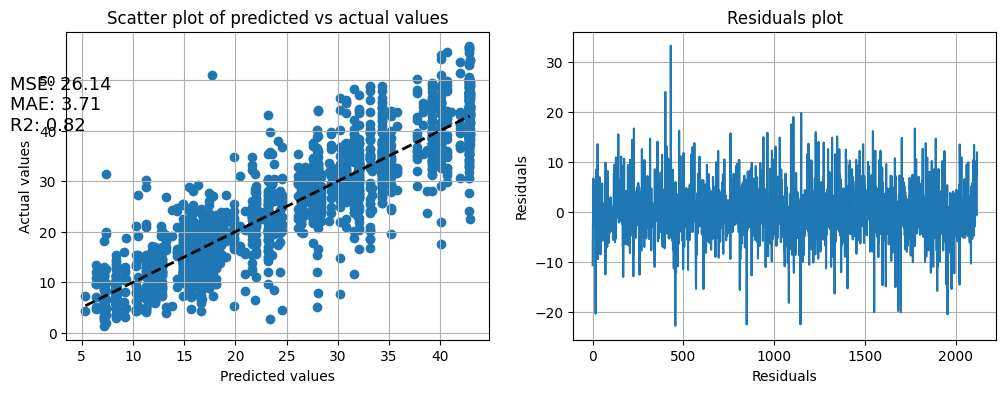

In [106]:
# Visualizing evaluation Metric Score chart

plot_scatter_residuals(y_test, y_pred, dt_mse, dt_mae, dt_r2)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

A Decision Tree can be  used for both classification and regression tasks. It models decisions and their possible consequences as a tree-like structure, where each internal node represents a decision based on a feature, each branch represents the outcome of that decision, and each leaf node represents a final output or prediction.

In [107]:
evaluation_metrics.head()

,Baseline,Linear Regression,Linear Regression_ scaled y,Linear_Regression_CV,Ridge Regression,Ridge Regression_CV,DecisionTree Regression
MSE,143.845006,54.220447,0.370069,52.446270,54.219348,54.217883,26.140431
MAE,10.083264,5.814104,0.481659,5.683640,5.814185,5.814352,3.707973
R2,-0.002300,0.622197,0.640492,0.622926,0.622204,0.622214,0.817856
time_taken,0.004200,0.036800,0.024700,0.249400,0.043300,2.997000,0.019500


From the evaluation metrics, we see that R2 score of decision treeregressor is considerable better than linear algorithms. We have obtained an MAE of 3.74 and an R2 score of 0.81.

#### 2. Cross- Validation & Hyperparameter Tuning

In [108]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


dtree = DecisionTreeRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
params = {'max_depth': np.arange(1, 20),
          'max_features': np.arange(5,10),
          'max_leaf_nodes': [10, 50, 100, 500],
          'min_samples_leaf': [1, 2, 4, 8, 16]
}


# Set up RandomisedSearchCV

selected_model_dtree = RandomizedSearchCV(
    estimator=dtree,
    param_distributions=params,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42)

# Fit RandomSearchCV

fit_results,dtcv_ft = fit_model(X_train, y_train, selected_model_dtree)


# Get the best model from RandomSearchCV

best_model_dtree = selected_model_dtree.best_estimator_

# Predict and evaluate

[y_pred,dtcv_mse, dtcv_mae, dtcv_r2], dtcv_pt = evaluate_model(best_model_dtree, X_test, y_test)


# Update the evaluation_metrics df

evaluation_metrics['decisionTree Regression_CV'] = [dtcv_mse, dtcv_mae, dtcv_r2,dtcv_ft+dtcv_pt]



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


##### Which hyperparameter optimization technique have you used and why?

We ahve used RandomisedSearchCV optimisation here because tyhere are many parameters tooptimise and the parameter space is a bit large.

Randomsearch doesn't go through each point in the parameter grid but instead selects random points to evaluate. this reduces the time and computational resources required for the algorithm.

In [109]:
evaluation_metrics.head()

,Baseline,Linear Regression,Linear Regression_ scaled y,Linear_Regression_CV,Ridge Regression,Ridge Regression_CV,DecisionTree Regression,decisionTree Regression_CV
MSE,143.845006,54.220447,0.370069,52.446270,54.219348,54.217883,26.140431,23.544853
MAE,10.083264,5.814104,0.481659,5.683640,5.814185,5.814352,3.707973,3.222981
R2,-0.002300,0.622197,0.640492,0.622926,0.622204,0.622214,0.817856,0.835941
time_taken,0.004200,0.036800,0.024700,0.249400,0.043300,2.997000,0.019500,1.393000


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We see some improvement after hyperparameter tuning and cross validation.
The R2 value has increased  from 0.81 to 0.4

However, the time taken is much longer at 1s compared to 0.03s withoput hyperparameter tuning.

### ML Model - 4 : Random Forest

In [110]:
# ML Model - 4 Implementation


selected_model =  RandomForestRegressor(n_estimators=200, random_state=42)

# Fit the Algorithm

rf_model, rf_ft = fit_model(X_train, y_train, selected_model )

# Train and evaluate decision Tree

[y_pred, rf_mse, rf_mae, rf_r2], rf_pt = evaluate_model(rf_model, X_test, y_test)


# Update the evaluation_metrics df

evaluation_metrics['Random Forest'] = [rf_mse, rf_mae, rf_r2,rf_ft+rf_pt]


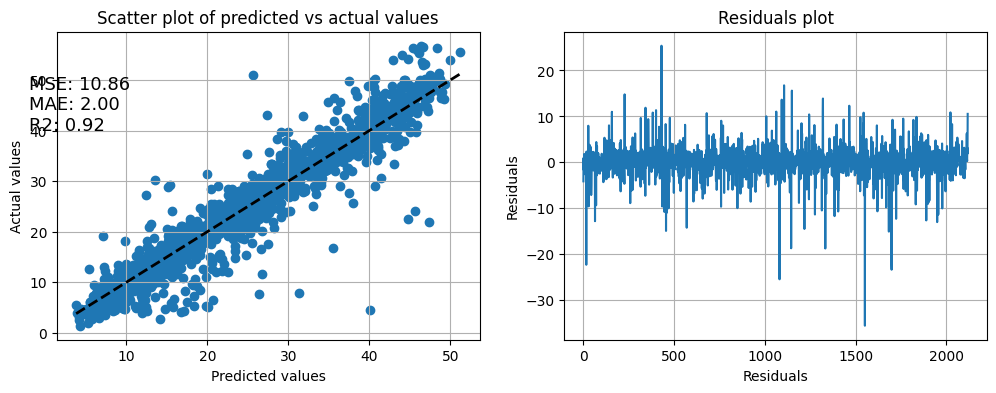

In [111]:
# Visualizing evaluation Metric Score chart

plot_scatter_residuals(y_test, y_pred, rf_mse, rf_mae, rf_r2)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random forest t is an ensemble learning method that combines multiple decision trees to improve predictive performance and control overfitting. It can be used for both classification and regression tasks.

In [112]:
evaluation_metrics.head()

,Baseline,Linear Regression,Linear Regression_ scaled y,Linear_Regression_CV,Ridge Regression,Ridge Regression_CV,DecisionTree Regression,decisionTree Regression_CV,Random Forest
MSE,143.845006,54.220447,0.370069,52.446270,54.219348,54.217883,26.140431,23.544853,10.856522
MAE,10.083264,5.814104,0.481659,5.683640,5.814185,5.814352,3.707973,3.222981,2.001878
R2,-0.002300,0.622197,0.640492,0.622926,0.622204,0.622214,0.817856,0.835941,0.924353
time_taken,0.004200,0.036800,0.024700,0.249400,0.043300,2.997000,0.019500,1.393000,8.405600


There is an improvement in R2 score to about 0.92 but this comes at a cost of an increased execution time of 6s.

#### 2. Cross- Validation & Hyperparameter Tuning

In [113]:
rf_model_cv = RandomForestRegressor(random_state=42)

params = {'n_estimators': [50, 100, 150],
           'max_depth': [5, 10, 15],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]
}

# # grid_search = GridSearchCV(rf_model_cv, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
selected_model_rf = RandomizedSearchCV(rf_model_cv, param_distributions=params, n_iter=50,
                              cv=5, n_jobs=-1, random_state=1
                              )

#  Fit the Algorithm

fit_results,rfcv_ft = fit_model(X_train, y_train, selected_model_rf)

best_model_rf = selected_model_rf.best_estimator_

#  Predict on the model

[y_pred,rfcv_mse, rfcv_mae, rfcv_r2], rfcv_pt = evaluate_model(best_model_rf, X_test, y_test)


#  Update the evaluation_metrics df

evaluation_metrics['RandomForest_CV'] = [rfcv_mse, rfcv_mae, rfcv_r2,rfcv_ft+rfcv_pt]



In [114]:
evaluation_metrics.head()

,Baseline,Linear Regression,Linear Regression_ scaled y,Linear_Regression_CV,Ridge Regression,Ridge Regression_CV,DecisionTree Regression,decisionTree Regression_CV,Random Forest,RandomForest_CV
MSE,143.845006,54.220447,0.370069,52.446270,54.219348,54.217883,26.140431,23.544853,10.856522,11.130718
MAE,10.083264,5.814104,0.481659,5.683640,5.814185,5.814352,3.707973,3.222981,2.001878,2.046806
R2,-0.002300,0.622197,0.640492,0.622926,0.622204,0.622214,0.817856,0.835941,0.924353,0.922442
time_taken,0.004200,0.036800,0.024700,0.249400,0.043300,2.997000,0.019500,1.393000,8.405600,369.539700


##### Which hyperparameter optimization technique have you used and why?

RandomSearchCV which uses the Random Search technique for finding the optimal hyperparameters to increase the model performance.

If we've very large hyperparameter space and training time for the model is quite long then we can go for this technique to find best hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

:No, we havent seen much improvement in R2 which remains at 0.86 but the time taken for execution has increased hugely to 470s.


### ML Model - 5 : XGBoost


In [115]:
# ML Model - 4 Implementation


selected_model =  XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)

# Fit the Algorithm

xgb_model, xgb_ft = fit_model(X_train, y_train, selected_model )

# Train and evaluate decision Tree

[y_pred, xgb_mse, xgb_mae, xgb_r2], xgb_pt = evaluate_model(xgb_model, X_test, y_test)


# Update the evaluation_metrics df

evaluation_metrics['XGBoost'] = [xgb_mse, xgb_mae, xgb_r2,xgb_ft+xgb_pt]

In [116]:
evaluation_metrics.head()

,Baseline,Linear Regression,Linear Regression_ scaled y,Linear_Regression_CV,Ridge Regression,Ridge Regression_CV,DecisionTree Regression,decisionTree Regression_CV,Random Forest,RandomForest_CV,XGBoost
MSE,143.845006,54.220447,0.370069,52.446270,54.219348,54.217883,26.140431,23.544853,10.856522,11.130718,8.938361
MAE,10.083264,5.814104,0.481659,5.683640,5.814185,5.814352,3.707973,3.222981,2.001878,2.046806,1.733781
R2,-0.002300,0.622197,0.640492,0.622926,0.622204,0.622214,0.817856,0.835941,0.924353,0.922442,0.937718
time_taken,0.004200,0.036800,0.024700,0.249400,0.043300,2.997000,0.019500,1.393000,8.405600,369.539700,1.206900


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [117]:

xgb_model_cv = XGBRegressor(random_state=1)

# # ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
     'max_depth': [3, 4, 6, 10, 12, 15],
     'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 1.0],
    'n_estimators': [50, 100, 200, 300, 500],
     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# # grid_search = GridSearchCV(rf_model_cv, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
selected_model_xgb = RandomizedSearchCV(xgb_model_cv, param_distributions=params, n_iter=50,
                               cv=5, n_jobs=-1, random_state=42
                               )

# # Fit the Algorithm

fit_results,xgbcv_ft = fit_model(X_train, y_train, selected_model_xgb)

best_model_xgb = selected_model_xgb.best_estimator_

 # Predict on the model

[y_pred,xgbcv_mse, xgbcv_mae, xgbcv_r2], xgbfcv_pt = evaluate_model(best_model_xgb, X_test, y_test)


# # Update the evaluation_metrics df

evaluation_metrics['XGBoost_CV'] = [xgbcv_mse, xgbcv_mae, xgbcv_r2,xgbcv_ft+xgbfcv_pt]





In [118]:
evaluation_metrics.head()

,Baseline,Linear Regression,Linear Regression_ scaled y,Linear_Regression_CV,Ridge Regression,Ridge Regression_CV,DecisionTree Regression,decisionTree Regression_CV,Random Forest,RandomForest_CV,XGBoost,XGBoost_CV
MSE,143.845006,54.220447,0.370069,52.446270,54.219348,54.217883,26.140431,23.544853,10.856522,11.130718,8.938361,8.636073
MAE,10.083264,5.814104,0.481659,5.683640,5.814185,5.814352,3.707973,3.222981,2.001878,2.046806,1.733781,1.792549
R2,-0.002300,0.622197,0.640492,0.622926,0.622204,0.622214,0.817856,0.835941,0.924353,0.922442,0.937718,0.939825
time_taken,0.004200,0.036800,0.024700,0.249400,0.043300,2.997000,0.019500,1.393000,8.405600,369.539700,1.206900,317.905000


##### Which hyperparameter optimization technique have you used and why?

We have used RandomSearchCV  for finding the optimal hyperparameters to increase the model performance.

As we've  large hyperparameter space and training time for the model is quite long we have chosen Random Search CV.

In RandomSearchCV, along with Random Search, cross-validation is also performed. Cross-Validation is used while training the model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I've used three evaluation metrics R-squared ($ R^2$), Mean Squared Error ($ MSE$) and Mean Absolute Error ($MAE$).

* $R^2$ measures how much of the variance in the target variable is explained by the model. A high
 score indicates that the model is able to capture a large portion of the variance in the target variable, and therefore is a good fit for the data.

 From a business perspective, a high $R^2$
 score can indicate that the model is accurately predicting the target variable, which can be valuable for decision-making purposes.

* $ MSE$ measures the average squared difference between the predicted and actual values. A low $MSE$
 score indicates that the model's predictions are close to the actual values.

 From a business perspective, a low
 score can indicate that the model is making accurate predictions, which can be valuable for decision-making purposes.


* $MAE$ measures the average absolute difference between the predicted and actual values. Like MSE, a low $MAE$
 score indicates that the model's predictions are close to the actual values. However, $MAE$
 is less sensitive to outliers than
.

  From a business perspective, a low
 score can indicate that the model is making accurate predictions across a wide range of values, which can be valuable for decision-making purposes.

Hence, these evaluation metrics can help a business to assess the performance of a machine learning model and its potential impact on business outcomes




### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [121]:
# Viewing the final evaluation metrics table

evaluation_metrics.transpose()

,MSE,MAE,R2,time_taken
Baseline,143.845006,10.083264,-0.002300,0.0042
Linear Regression,54.220447,5.814104,0.622197,0.0368
Linear Regression_ scaled y,0.370069,0.481659,0.640492,0.0247
Linear_Regression_CV,52.446270,5.683640,0.622926,0.2494
Ridge Regression,54.219348,5.814185,0.622204,0.0433
Ridge Regression_CV,54.217883,5.814352,0.622214,2.9970
DecisionTree Regression,26.140431,3.707973,0.817856,0.0195
decisionTree Regression_CV,23.544853,3.222981,0.835941,1.3930
Random Forest,10.856522,2.001878,0.924353,8.4056
RandomForest_CV,11.130718,2.046806,0.922442,369.5397


We see that linear models like linewr regression and ridge regression do not perform very well for this data.

More complex models like decision Tree, Random forest and XGBoost perform well. However, cross validating and hyperparametertuning these models is a time taking and computationally intensive process. but these are important steps which cannot be left out.

Therefore we choose the XGBoost_CV as our chosen model as it has both the best performance with highest $R^2$ and lesser time than RandomForest_CV.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

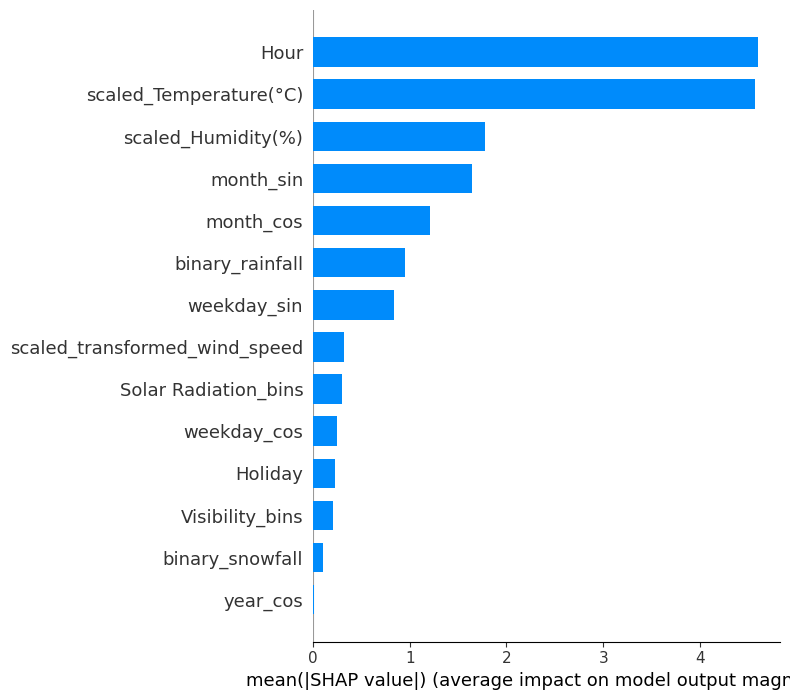

In [124]:
# Create a SHAP Explainer object
explainer = shap.Explainer(best_model_xgb)

# Calculate SHAP values for all features
shap_values = explainer(X_test)

# Plot the feature importance using a bar plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

A SHAP summary plot shows the overall importance of each feature in a machine learning model. It can be used to identify the most important features that are driving the model's predictions and gain insights into how those features are influencing the predictions.

We can see that Hour and Temperature are the two most important feature to predict rental bike demand, then followed by Humidity, month, Rainfall, weekday etc.

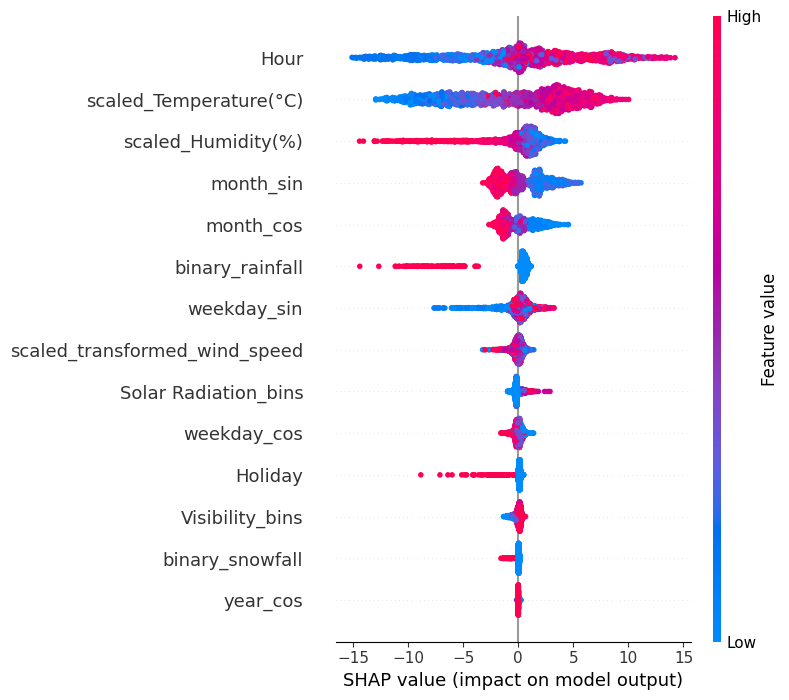

In [125]:
shap.summary_plot(shap_values, X_test)

Above plot is another way to visualise SHAP values. this plot not only shows which feature is most important but also the positive-negative impact of different values of features. For example, we can see that high values of both Hour and Temperature has positive impact on model output, whereas high values of both Humidity and rainfall has negative impact on model output.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [127]:
# Save the File

# Save the model to a pickle file
with open("xgb_model.pkl", "wb") as f:
  pickle.dump(best_model_xgb, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [128]:
# Load the File and predict unseen data.

# Load the model from the pickle file
with open("xgb_model.pkl", "rb") as f:
    loaded_xgb_model = pickle.load(f)

new_test_preds = loaded_xgb_model.predict(X_test)

# Sanity Check
mse = mean_squared_error(y_test, new_test_preds)
mae = mean_absolute_error(y_test, new_test_preds)
r2 = r2_score(y_test, new_test_preds)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 8.636073308591008
MAE: 1.7925494777458915
R2 Score: 0.9398245799605052


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Strategies to Enhance Bike Rental Demand:**

* **Targeted Marketing Initiatives:** Launch focused marketing campaigns during off-peak seasons, such as winter, to raise awareness. Highlight seasonal benefits, like winter biking experiences, and promote community events that encourage bike usage.

* **Dynamic Seasonal Pricing:** Implement a flexible pricing model that adjusts rates based on seasonal demand. Consider promotional offers during low-demand periods to entice users, such as "Buy One, Get One Free" deals.

* **Real-Time Dynamic Pricing:** Adopt a dynamic pricing strategy that varies based on location and rental times. Charge higher rates in high-demand areas during peak hours while offering discounts in quieter locations to balance usage.

* **Enhanced Visibility and Accessibility:** Increase the prominence of bike rental stations by improving signage and incorporating vibrant colors. Consider adding interactive maps or QR codes to guide users to nearby stations and provide real-time availability updates.

* **Incentive Programs and Partnerships:** Develop loyalty programs and referral incentives to reward frequent users. Collaborate with local businesses to offer discounts or rewards for customers who rent bikes and shop at partner locations, creating a community-oriented approach.

* **Community Engagement:** Host community events, such as group rides or bike maintenance workshops, to foster a sense of community around biking. Engaging local influencers or organizations can help amplify these efforts and attract more users.

* **Feedback Loops:** Establish mechanisms to gather user feedback regularly. Use insights to refine services, identify popular routes, and understand customer preferences better.

**Demand Insights:**

* Bike rental demand peaks during the summer months (May, June, July) and drops significantly in winter (December, January, February).

* Peak usage occurs during rush hours, particularly from 8-10 AM and 5-7 PM, indicating a strong market for commuters.

* Temperature plays a crucial role in demand, with usage rising as temperatures increase, peaking around 30°C. Consider weather forecasts for promotional strategies.

* Adverse weather conditions, such as rain and snow, correlate with reduced demand. Offering discounts for rentals on clear days following rain could encourage usage.

* Demand is generally lower on holidays compared to regular days, suggesting a need for tailored holiday promotions to attract users during these times.

**The XGBoost model** emerged as the top performer for predicting bike rental demand, achieving an impressive $R^2$ score of 0.94, with the lowest Mean Squared Error (MSE) at 8.356 and Mean Absolute Error (MAE) of 1.755.

**Feature importance analysis** using SHAP values identified the hour of the day, temperature, humidity, and month as the most significant factors influencing bike rental demand. Leveraging these insights can help refine marketing and operational strategies effectively.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***